In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
df= pd.read_csv('Housing.csv')

In [ ]:
df.shape

(545, 13)

In [ ]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Here ,Their is no missing value in entire datasets. so we not need to handel the missing value



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Select numerical columns for median imputation
numerical_cols = df.select_dtypes(include=np.number).columns

# Fill missing values with appropriate strategies (mean/median/mode for numerical, mode for categorical)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())  # Replace missing numerical values with median
df.fillna(df.mode().iloc[0], inplace=True)  # Replace missing categorical values with mode

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Identification of Variables of Interest
#### Endogenous Variable (Y)
* Price ("price"): The target variable, representing the cost of the property in monetary units. It is of type int64 and contains 545 non-null values.

Explanatory Variables (X)
* The explanatory variables are those that might influence the price of a house. Based on the available data, here are the explanatory variables along with their types and a brief description:

* Area ("area"): Total size of the house in square meters. Type: int64, 545 non-null values.
* Number of bedrooms ("bedrooms"): Total number of bedrooms. Type: int64, 545 non-null values.
* Number of bathrooms ("bathrooms"): Total number of bathrooms. Type: int64, 545 non-null values.
* Number of stories ("stories"): Indicates whether the house has one or multiple floors. Type: int64, 545 non-null values.
* Main road ("mainroad"): Indicates whether the house is close to a main road (Yes/No). Type: object, 545 non-null values.
* Guestroom ("guestroom"): Indicates whether the house has a guestroom (Yes/No).Type: object, 545 non-null values.
* Basement ("basement"): Indicates whether the house has a basement (Yes/No). Type: object, 545 non-null values.
* Hot water heating ("hotwaterheating"): Presence of a hot water heating system (Yes/No). Type: object, 545 non-null values.
* Air conditioning ("airconditioning"): Indicates whether the house has an air conditioning system (Yes/No). Type: object, 545 non-null values.
* Parking ("parking"): Number of parking spaces. Type: int64, 545 non-null values.
* Preferred area ("prefarea"): Indicates whether the house is in a preferred location (Yes/No). Type: object, 545 non-null values.
* Furnishing status ("furnishingstatus"): Indicates whether the house is furnished, partially furnished, or unfurnished. Type: object, 545 non-null values.





#### Hypotheses on the Direction of Statistical Relationships
* Area: A larger area suggests a higher price.
* Number of bedrooms/bathrooms/stories: These factors contribute to comfort and overall property value, potentially increasing the price.
* Main road proximity: This can either increase the price due to convenience or decrease it due to noise and pollution.
* Guestroom, basement, heating, air conditioning: The presence of these features may make the house more attractive, leading to higher prices.
* Parking: More parking spaces could increase the property's value.
* Preferred area: Being in a preferred location may indicate higher property prices.
* Furnishing status: Fully furnished homes may have higher prices compared to unfurnished or partially furnished ones.

In [ ]:
# Summary of descriptive statistics for quantitative and qualitative variables.
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545     

Here are some conclusions based on the descriptive statistics of quantitative variables:

* Price ​​("price") : The average price of a house is around 4,77 million monetary units, with a minimum value of 1,75 million and a maximum of 13,3 million. The spread-type of 1,87 million suggests a significant dispersion of prices.

* Surface ("area"): The average surface is 5 150, with a significant dispersion (variance-type of 2 170). The minimum size is 1 650 and the maximum is 16 200.

* Number of rooms ("bedrooms"): The average number of rooms is around 2.97, with a minimum of one bedroom and a maximum of six.
* Number of bathrooms ("bathrooms"): The average number of bathrooms is 1,29, with a minimum value of one bathroom and a maximum of four.

* Number of stories ("stories"): On average, the houses have 1.81 storeys, with values ​​varying from 1 to 4.

* Parking ("parking"): The average number of parking spaces is 0,69, with a relatively large dispersion, ranging from 0 to 3.

# 1. Distribution of quantitative variables

In [ ]:
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

**a. price("price")**

<Axes: ylabel='price'>

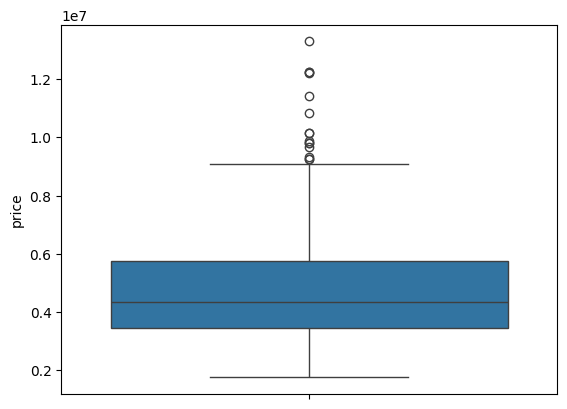

In [ ]:
sns.boxplot(df['price'])


We notice that the price has a good distribution and has no outliers.

<Axes: xlabel='price', ylabel='Count'>

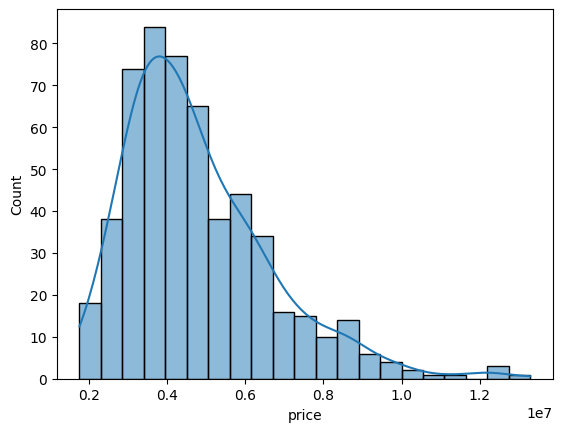

In [ ]:
sns.histplot(df['price'], kde=True)


We can see that the price follows a normal distribution, with a slight negative skewness.

In [ ]:
df['price'].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


The average price is about 4.77 million currency units, with a median of 4.34 million. The minimum value is 1.75 million and the maximum is 13.3 million. The standard deviation of 1.87 million suggests significant price dispersion.

**b.Surface ("area")**

<Axes: ylabel='area'>

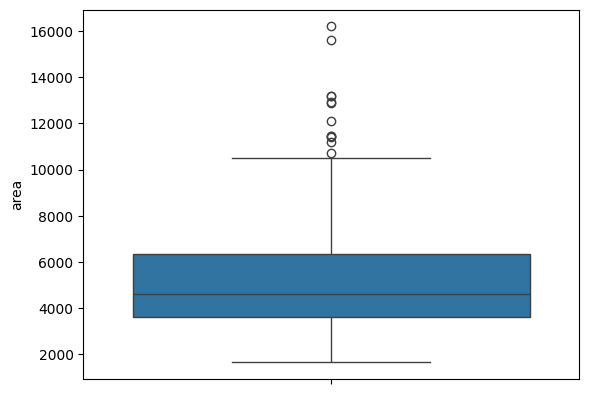

In [ ]:
sns.boxplot(df['area'])


It is observed that there are some outliers in the area variable.

<Axes: xlabel='area', ylabel='Count'>

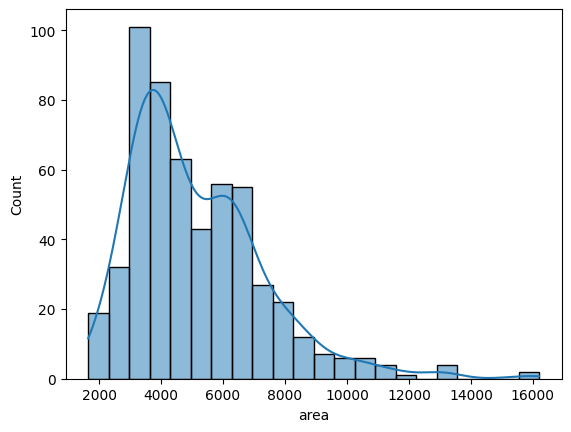

In [ ]:
sns.histplot(data=df, x='area', kde=True)

Area appears to follow almost a normal distribution, but with some outliers to the right.

In [ ]:
df['area'].describe()

,area
count,545.000000
mean,5150.541284
std,2170.141023
min,1650.000000
25%,3600.000000
50%,4600.000000
75%,6360.000000
max,16200.000000


Area has a mean of 5,150, with a spread of 2,170. The minimum value is 1,650 and the maximum is 16,200.

In [ ]:
df[df['area'] > 12000].shape[0]

7

There are only 7 values ​​greater than 12000.

In [ ]:
z_scores = (df['area'] - np.mean(df['area'])) / np.std(df['area'])
outliers = np.abs(z_scores) > 3
outliers.sum()

7

<Axes: xlabel='area', ylabel='Count'>

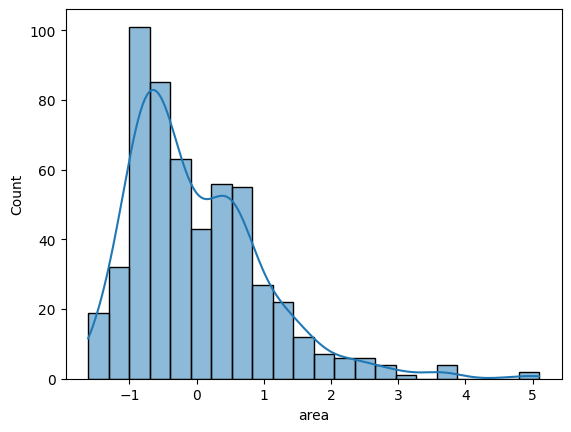

In [ ]:
# z_scores
sns.histplot(z_scores, kde=True)

If we calculate the z-score for the area variable, we find that 7 values ​​are greater than 3, these can be considered as outliers.

<Axes: xlabel='area', ylabel='Count'>

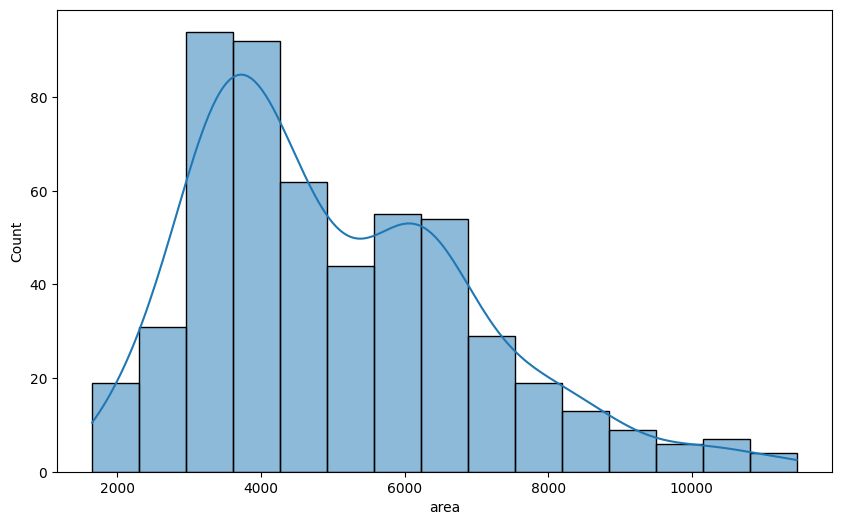

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[~outliers], x='area', kde=True)

The distribution of area without the outliers appears closer to a normal distribution.

Text(0.5, 1.0, 'Boxplot without outliers')

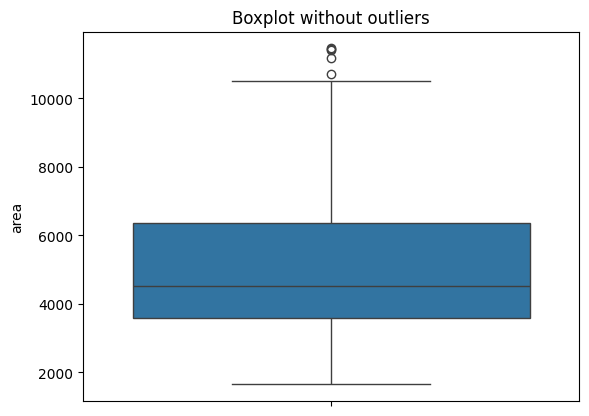

In [ ]:
sns.boxplot(df[~outliers]['area']).set_title('Boxplot without outliers')

Despite the presence of outliers, we can keep them for the analysis, as they could be real cases. We can also consider excluding them if they negatively affect the regression models (especially those with a z-score greater than 3).

**c.Number of rooms ("bedrooms")**

In [ ]:
df['bedrooms'].describe()

,bedrooms
count,545.000000
mean,2.965138
std,0.738064
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,6.000000


We notice that the average is close to 3, which makes sense for a house. The 2nd quartile and 3rd quartile are 3, which means that most houses have 3 bedrooms.

In [ ]:
df['bedrooms'].value_counts()

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


<Axes: xlabel='bedrooms'>

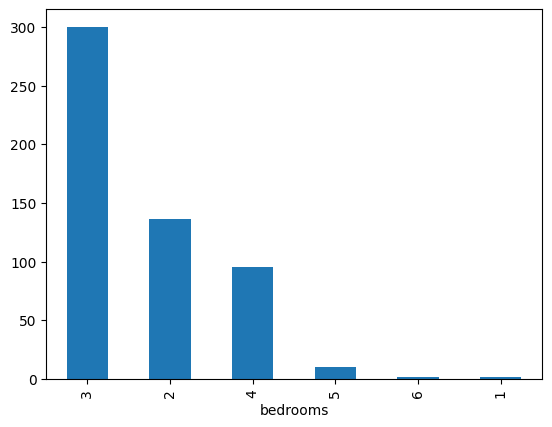

In [ ]:
df['bedrooms'].value_counts().plot(kind='bar')


<Axes: ylabel='bedrooms'>

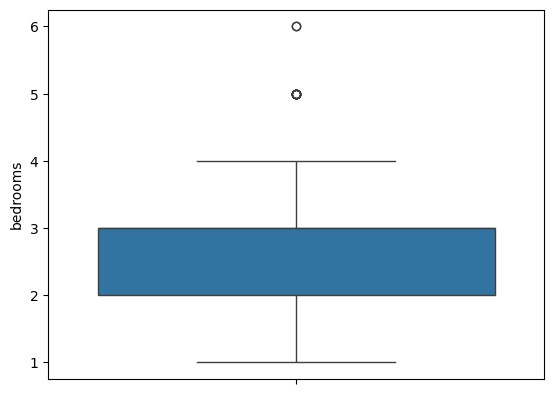

In [ ]:
sns.boxplot(df['bedrooms'])

We have some outliers in the bedrooms variable:

In [ ]:
bedrooms_outliers = (df['bedrooms'] >= 5)
bedrooms_outliers.sum()

12

Text(0.5, 1.0, 'Boxplot without outliers')

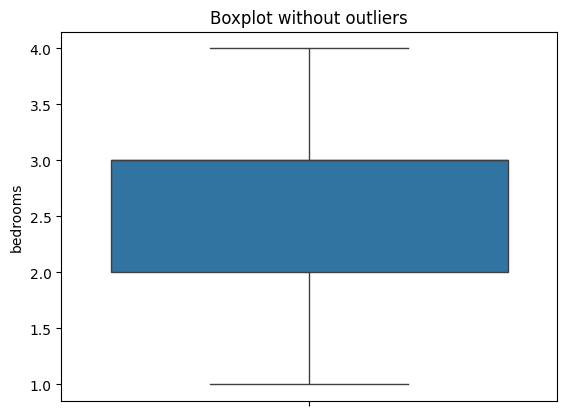

In [ ]:
sns.boxplot(df[~bedrooms_outliers]['bedrooms']).set_title('Boxplot without outliers')

In this datasets, we have to kept it

**d.Number of bathrooms ("bathrooms")**

In [ ]:
df['bathrooms'].describe()


,bathrooms
count,545.000000
mean,1.286239
std,0.502470
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


The maximum value is 4, and The minimum value is 1, which makes sense for a house. The mean is 1.29, which means most houses have 1 bathroom. The standard deviation is 0.5, which means the spread is small.

In [ ]:
df['bathrooms'].value_counts()


,count
bathrooms,
1,401
2,133
3,10
4,1


<Axes: xlabel='bathrooms'>

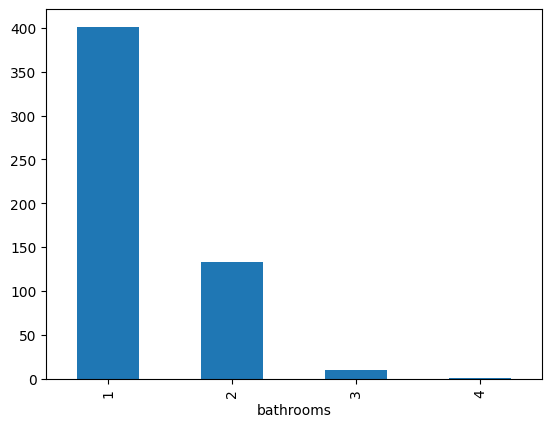

In [ ]:
df['bathrooms'].value_counts().plot(kind='bar')


We only have 3 houses with a bathroom greater than 3.

**e. Number of stories ("stories")**






In [ ]:
df['stories'].describe()


,stories
count,545.000000
mean,1.805505
std,0.867492
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


The mean is 1.80 which means that most of the houses have almost 1 floor. The minimum value is 1 and the maximum is 4. The standard deviation is 0.86 which means that the dispersion is large.

In [ ]:
df['stories'].value_counts()


,count
stories,
2,238
1,227
4,41
3,39


<Axes: xlabel='stories'>

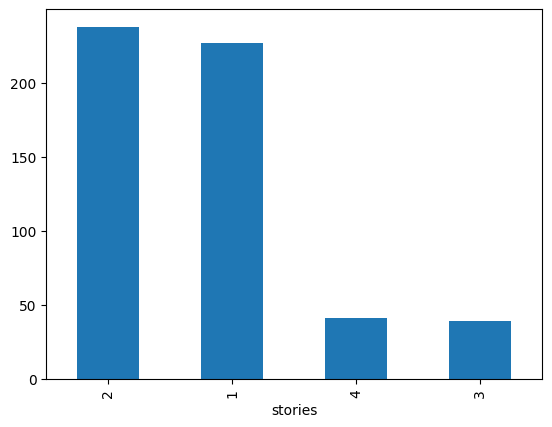

In [ ]:
df['stories'].value_counts().plot(kind='bar')


**f. Parking ("parking")**


In [ ]:
df['parking'].describe()


,parking
count,545.000000
mean,0.693578
std,0.861586
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


The minimum, 1st quartile and 2nd quartile are 0, which means that most of the houses do not have parking. The mean is 0.69 and the maximum value is 3. The standard deviation is 0.75 which means that the dispersion is large.

In [ ]:
df['parking'].value_counts()


,count
parking,
0,299
1,126
2,108
3,12


<Axes: xlabel='parking'>

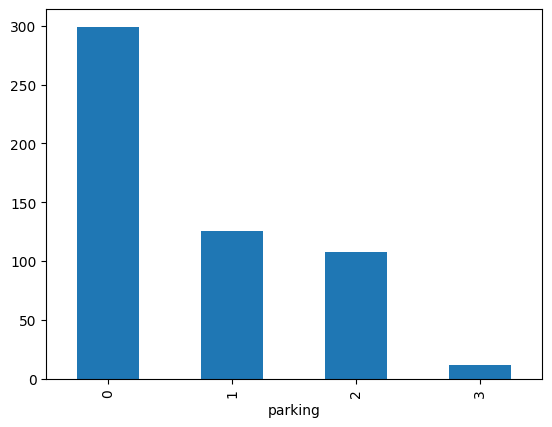

In [ ]:
df['parking'].value_counts().plot(kind='bar')



We only have 3 houses with 3 parking spaces.

# 2. Analysis of qualitative variables

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

**a. Route Main("mainroad")**

In [ ]:
df['mainroad'].value_counts()


,count
mainroad,
yes,468
no,77


In [ ]:
df['mainroad'].value_counts(normalize=True)


,proportion
mainroad,
yes,0.858716
no,0.141284


The mainroad variable is a categorical variable with two categories: Yes and No. We can see that most of the houses are located near a main road.

**b. Guestroom ("guestroom")**

In [ ]:
df['guestroom'].value_counts()


,count
guestroom,
no,448
yes,97


The guestroom variable is also a categorical variable with two categories: Yes and No. We can see that most houses do not have a guest room.

**c. Basement ("basement")**

In [ ]:
df['basement'].value_counts()


,count
basement,
no,354
yes,191


The basement variable is also a categorical variable with two categories: Yes and No. We can see that most houses do not have a basement

**d. Hot water heating ("hotwaterheating")**

In [ ]:
df['hotwaterheating'].value_counts()


,count
hotwaterheating,
no,520
yes,25


In [ ]:
df['hotwaterheating'].value_counts(normalize=True)


,proportion
hotwaterheating,
no,0.954128
yes,0.045872


The variable hotwaterheating is also a categorical variable with two categories: Yes and No. Almost all homes do not have hot water heating. 95% of homes do not have hot water heating.

**e. Air conditioning ("airconditioning")**

In [ ]:
df['airconditioning'].value_counts()


,count
airconditioning,
no,373
yes,172


In [ ]:
df['airconditioning'].value_counts(normalize=True)


,proportion
airconditioning,
no,0.684404
yes,0.315596


The airconditioning variable is also a categorical variable with two categories: Yes and No. Almost 70% of homes do not have air conditioning.

**f. Preferred area ("prefarea")**

In [ ]:
df['prefarea'].value_counts()


,count
prefarea,
no,417
yes,128


In [ ]:
df['prefarea'].value_counts(normalize=True)


,proportion
prefarea,
no,0.765138
yes,0.234862


The variable prefarea is also a categorical variable with two categories: Yes and No. We can see that 76% of the houses are not in a preferred area.

**g. Furnishing status ("furnishingstatus")**

In [ ]:
df['furnishingstatus'].value_counts()


,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [ ]:
df['furnishingstatus'].value_counts(normalize=True)


,proportion
furnishingstatus,
semi-furnished,0.416514
unfurnished,0.326606
furnished,0.256881


<Axes: xlabel='furnishingstatus'>

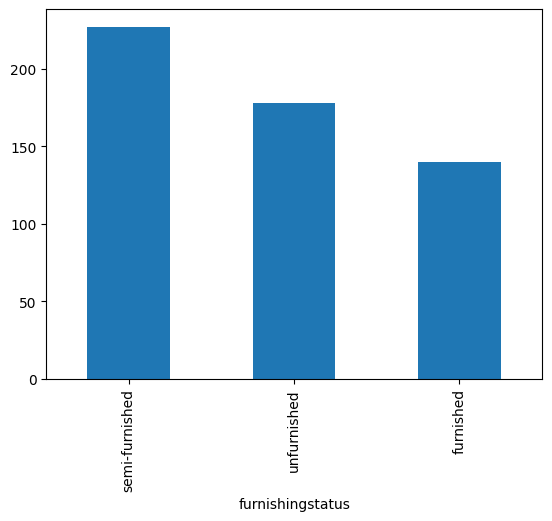

In [ ]:
df['furnishingstatus'].value_counts().plot(kind='bar')


The furnishingstatus variable is a categorical variable with three categories: Furnished, Partially Furnished, and Unfurnished.

# Conclusion
All categorical variables are of binary type, only furnishingstatus is a categorical variable with three categories.

# Correlation between explanatory variables

**1. Bivariate analysis: numerical & numerical**


In [ ]:
X = df.drop(['price'], axis=1)


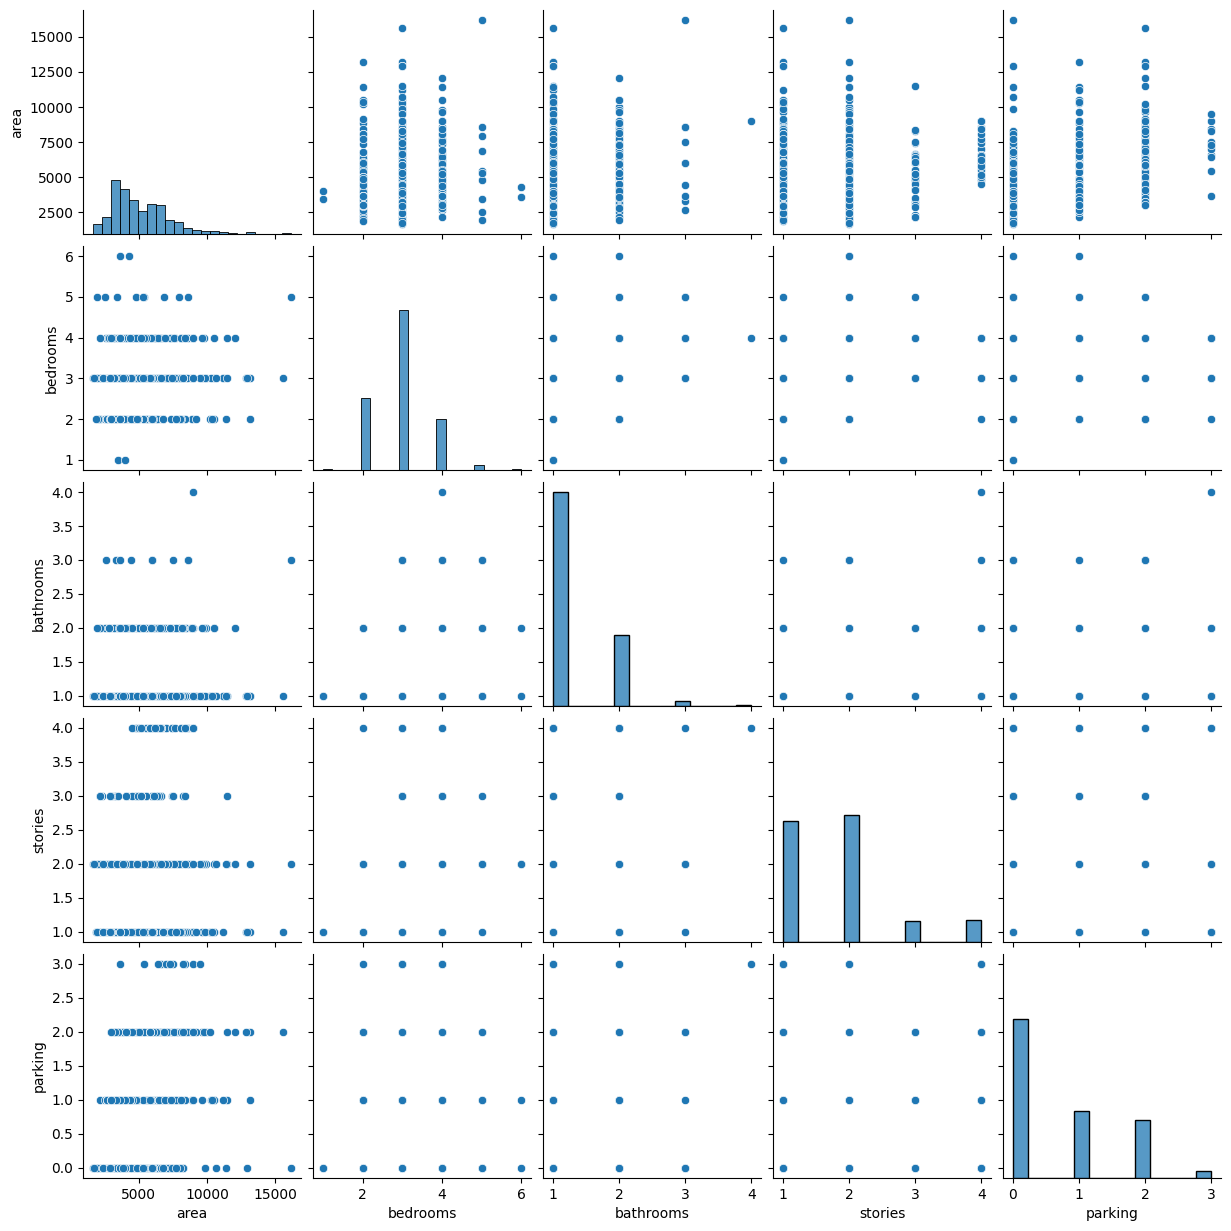

In [ ]:
sns.pairplot(X.select_dtypes(exclude=['object']))


After visualizing the relationship between the explanatory variables, no significant correlation was found.

<Axes: >

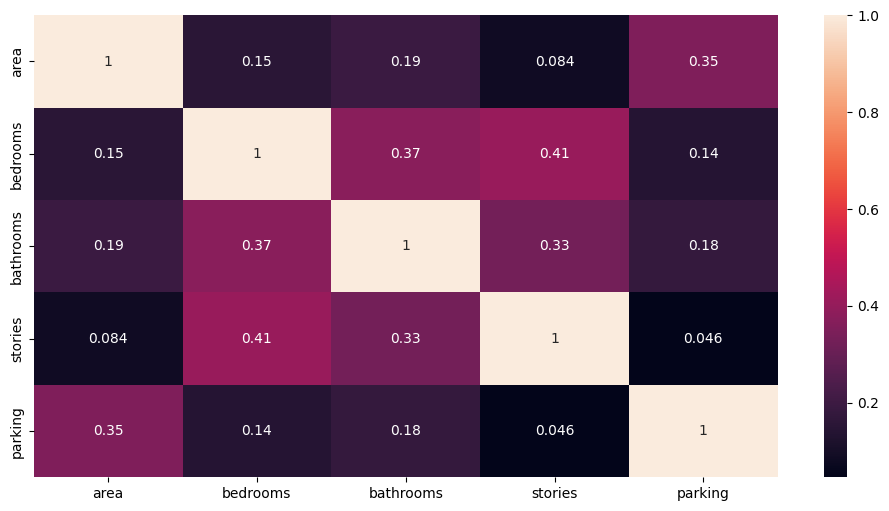

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(X.select_dtypes(exclude=['object']).corr(), annot=True)

We note that the correlation between the explanatory variables is low, which is good news for linear regression.

We also note that the more the number of parking spaces increases, the more the number of floors decreases.

 **2. Bivariate analysis: numerical & categorical**

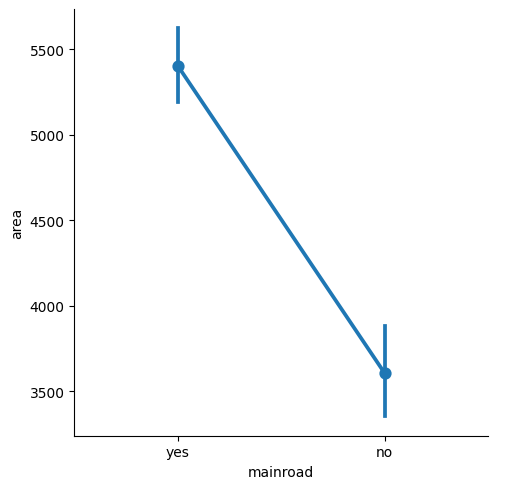

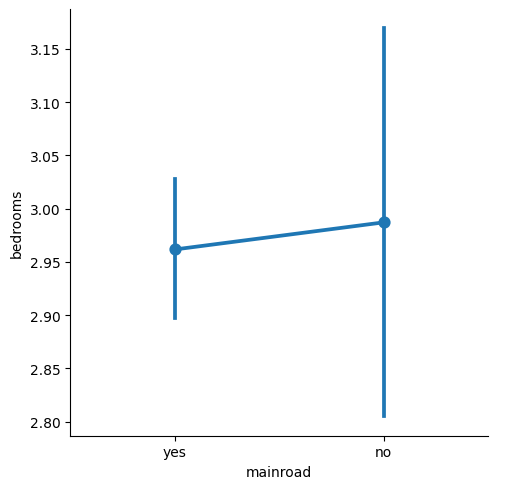

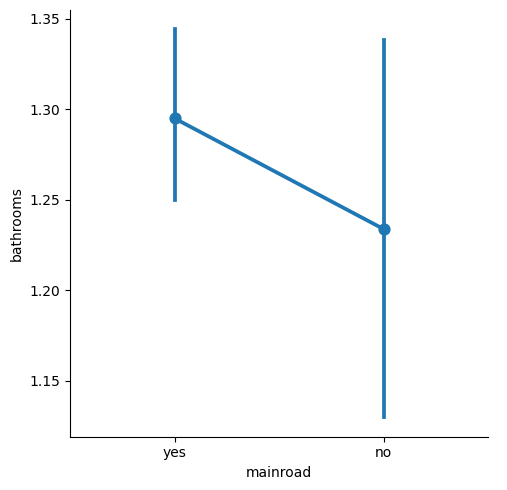

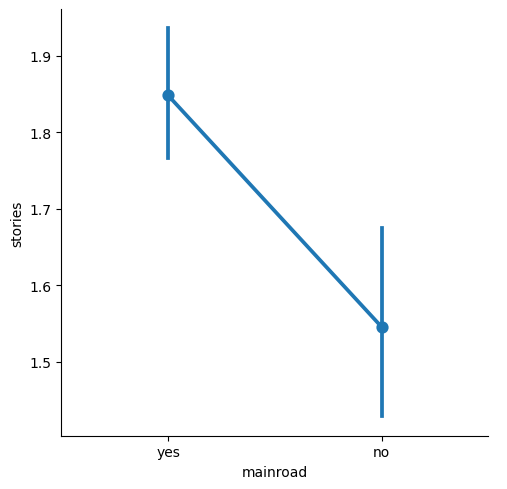

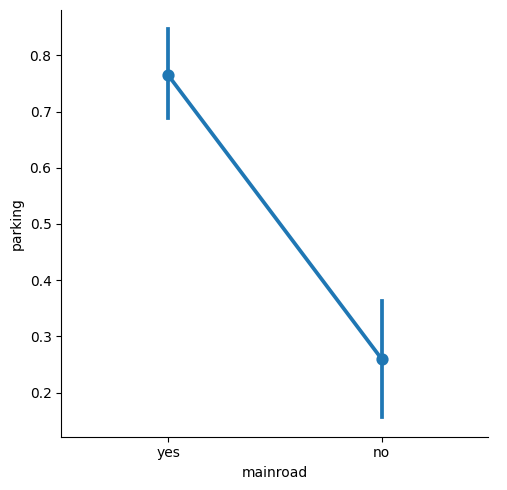

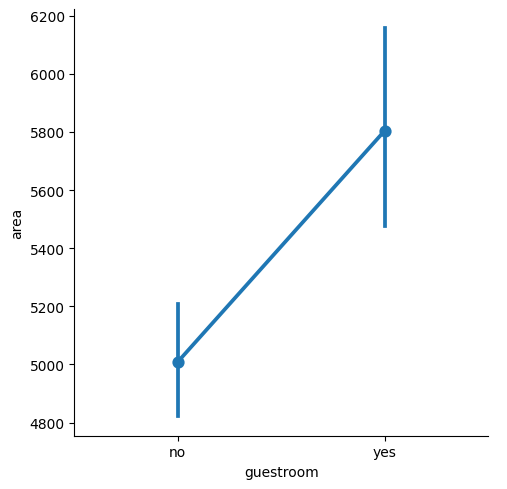

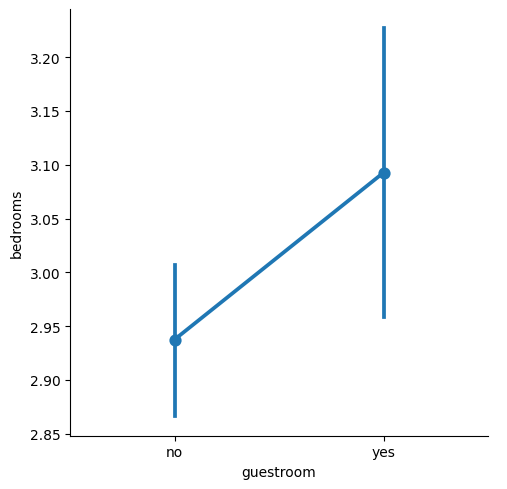

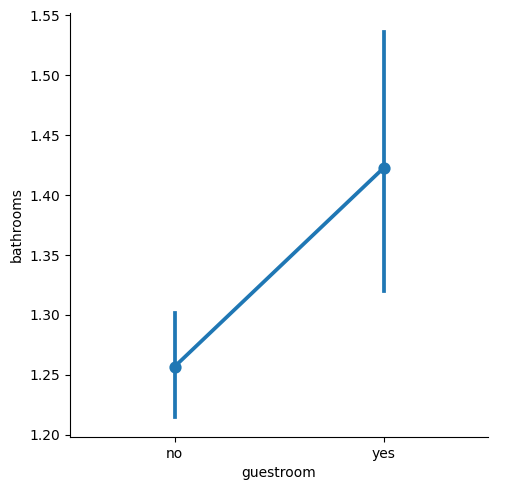

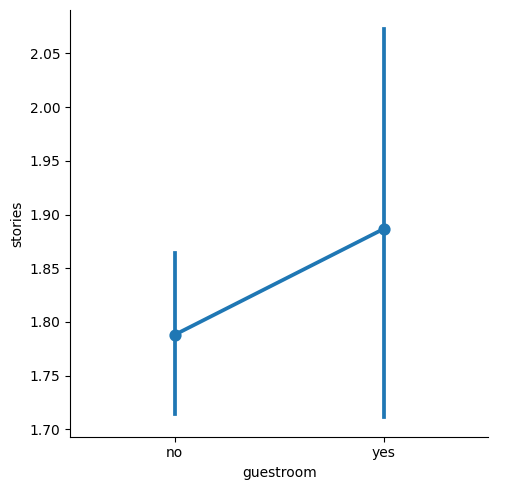

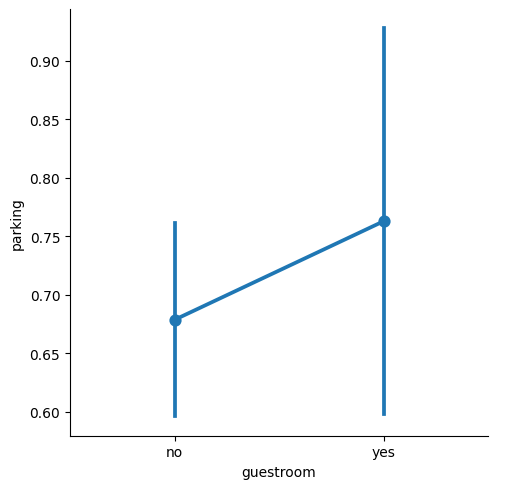

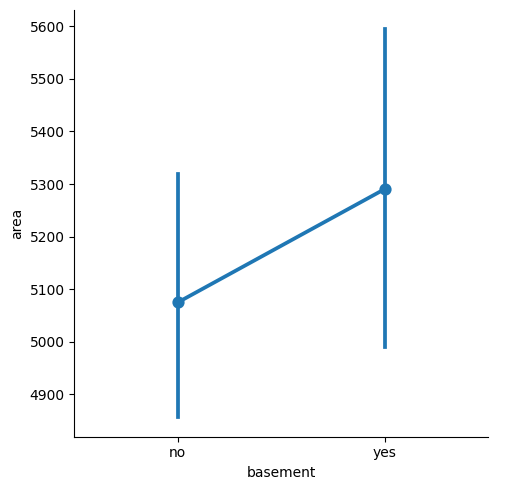

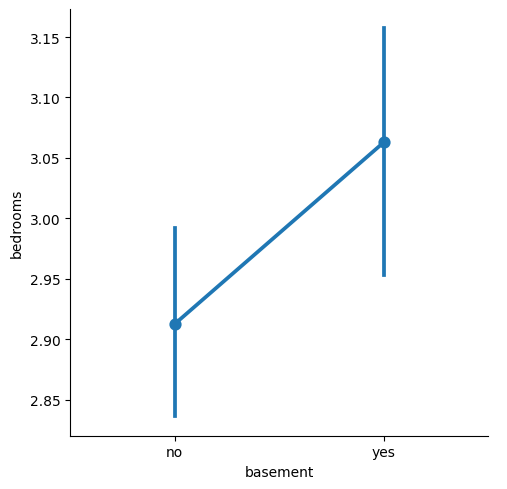

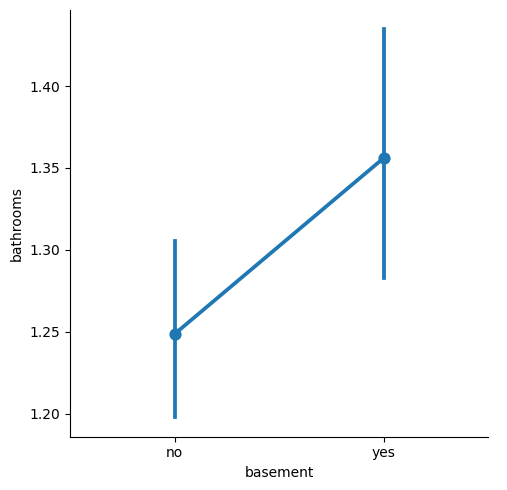

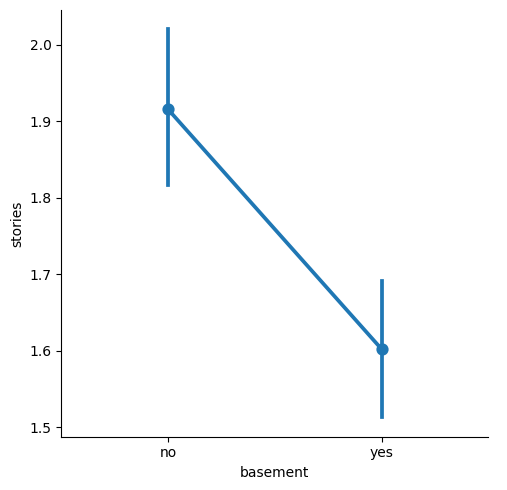

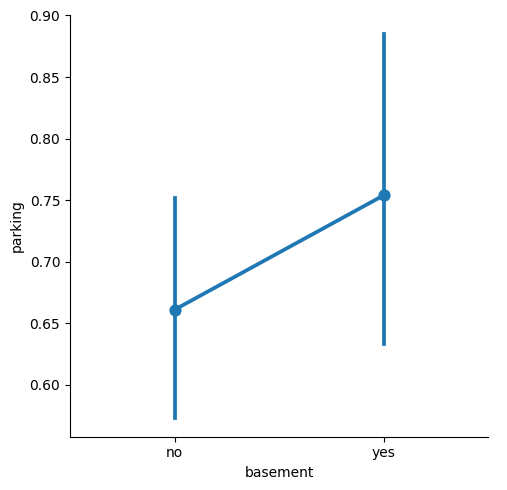

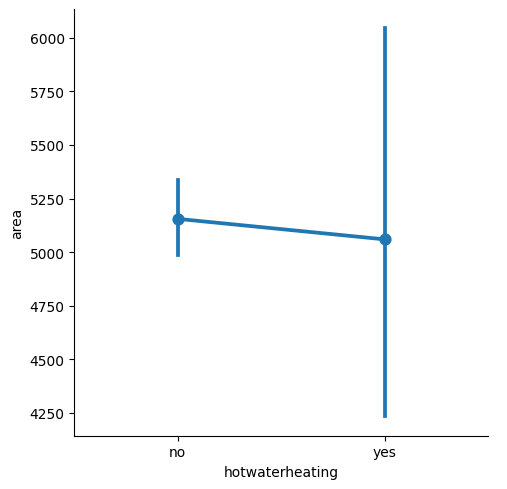

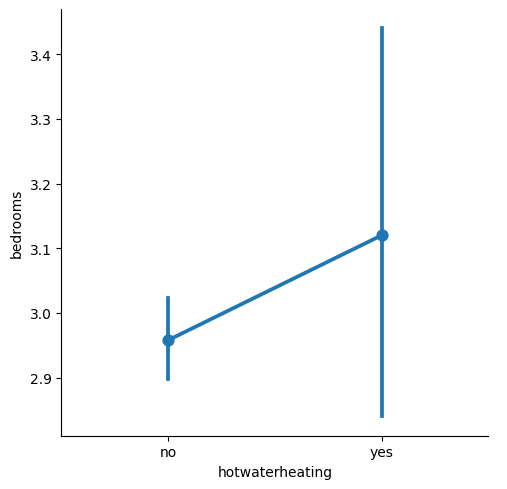

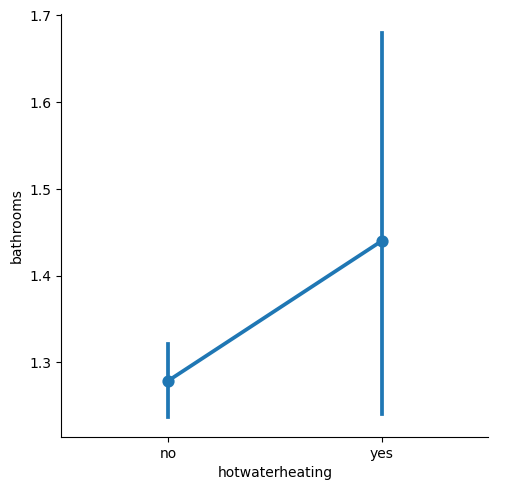

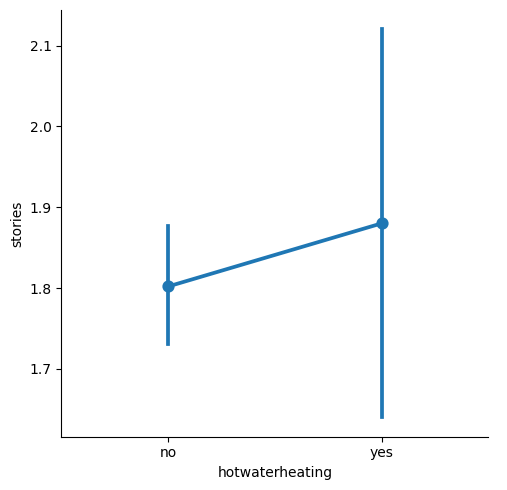

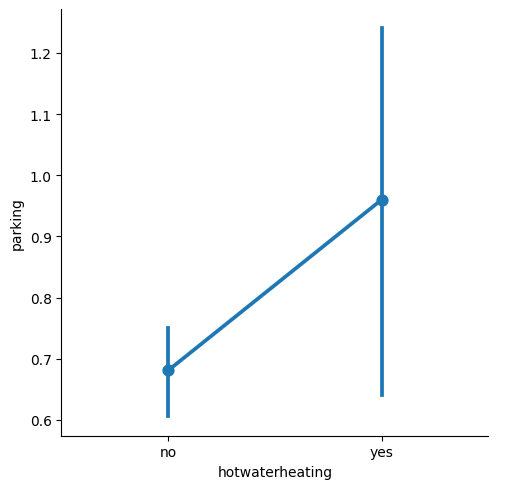

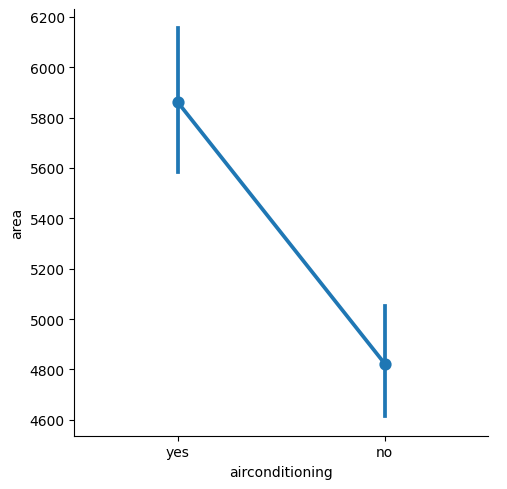

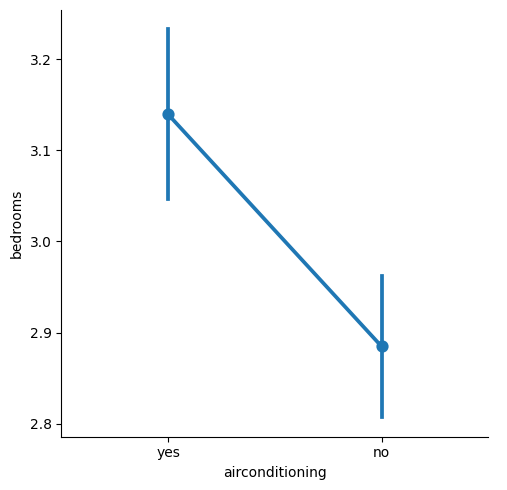

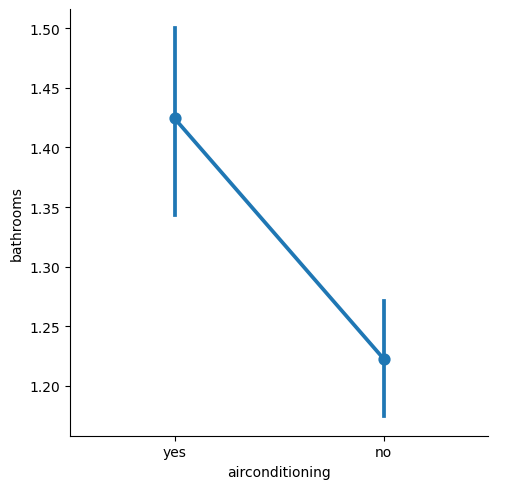

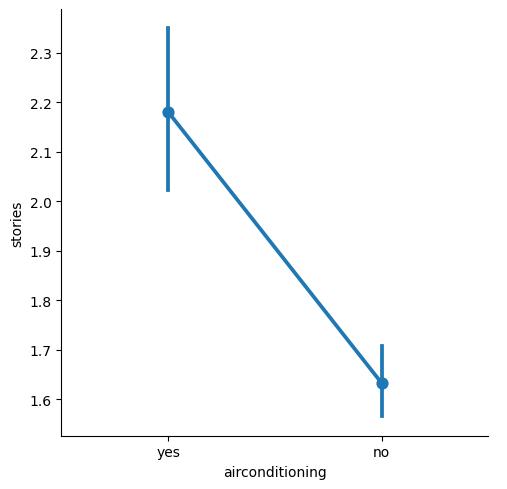

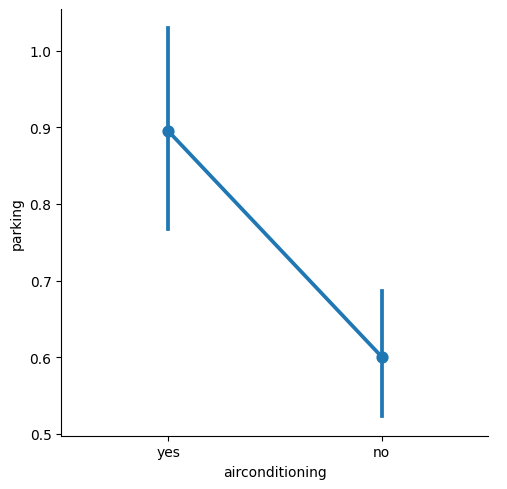

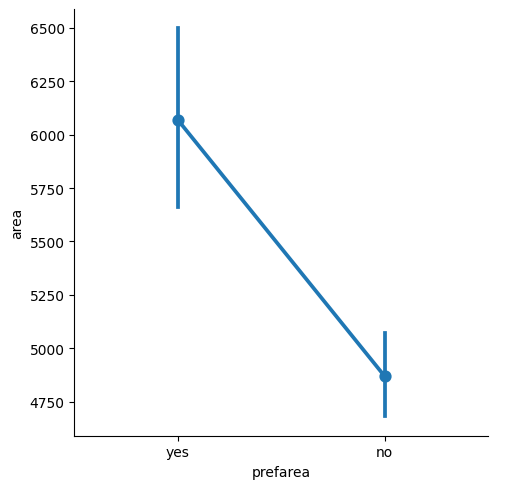

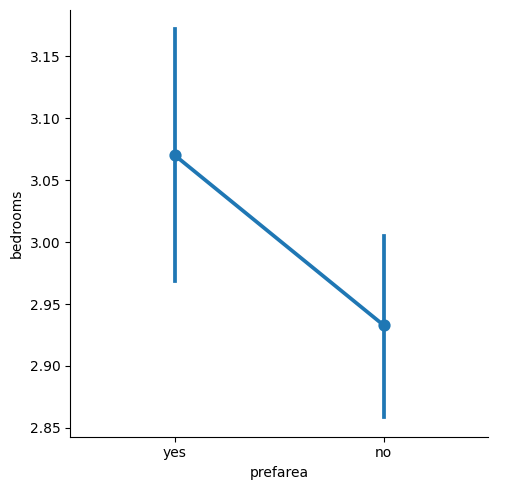

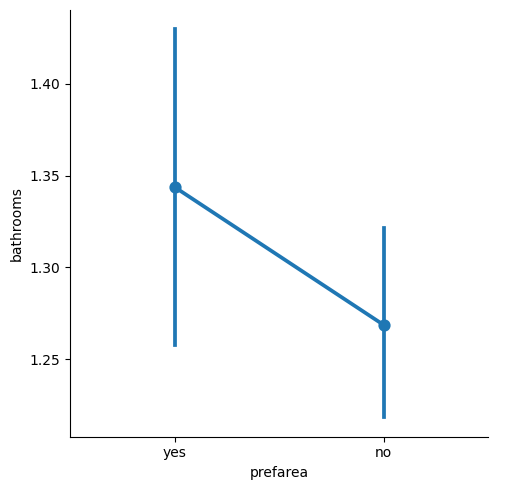

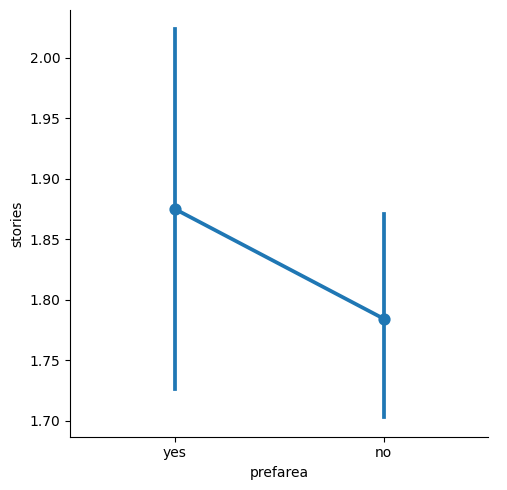

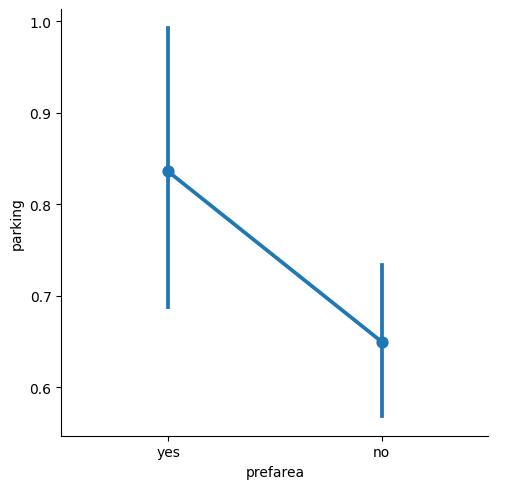

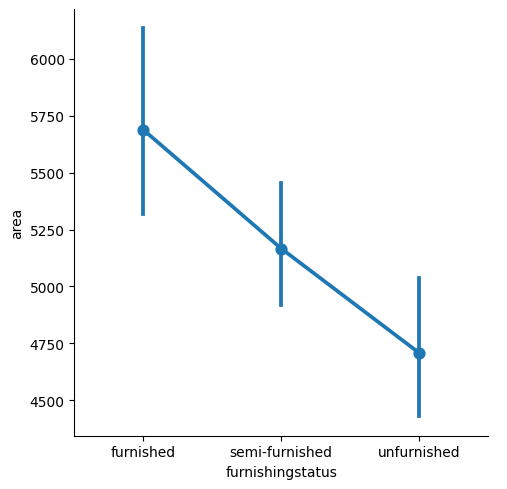

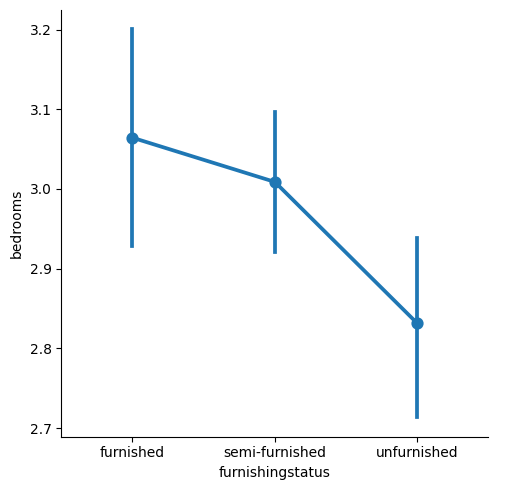

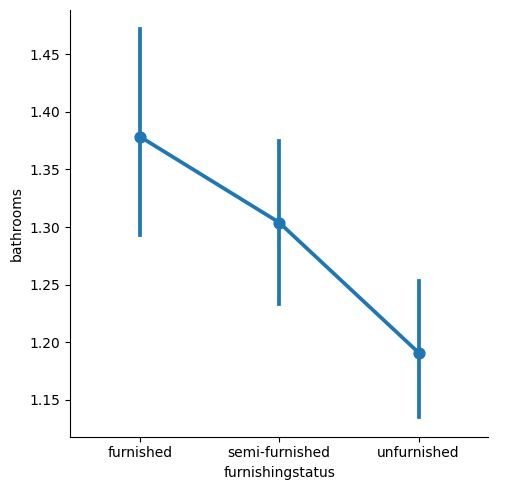

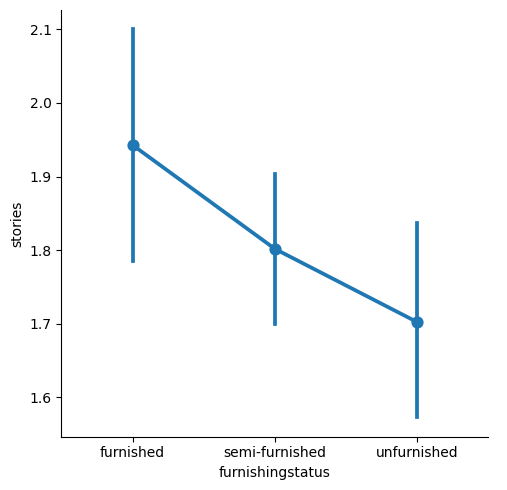

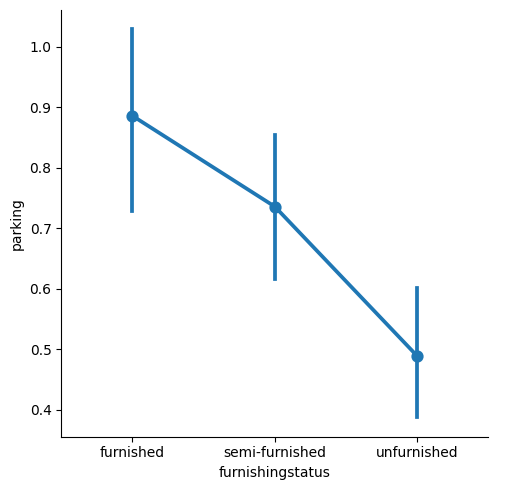

In [ ]:
for categ in X.select_dtypes(include=['object']).columns:
    for num, col in enumerate(X.select_dtypes(exclude=['object']).columns):
        sns.catplot(x=categ, y=col, data=X, kind='point')
        plt.show()

Most of the categorical variables are binary and do not show a clear trend according to the numerical variables, especially since their distribution is not balanced between the two categories.

For example in the first figure, we see that the area Area according to the variable mainroad shows a certain trend that houses located near a main road have a larger area, but this trend is not necessarily real.

This is due to the fact that the distribution of houses located near a main road is different from those that are not. Indeed 85% of the houses are located near a main road.

**3.Bivariate analysis: categorical & categorical**

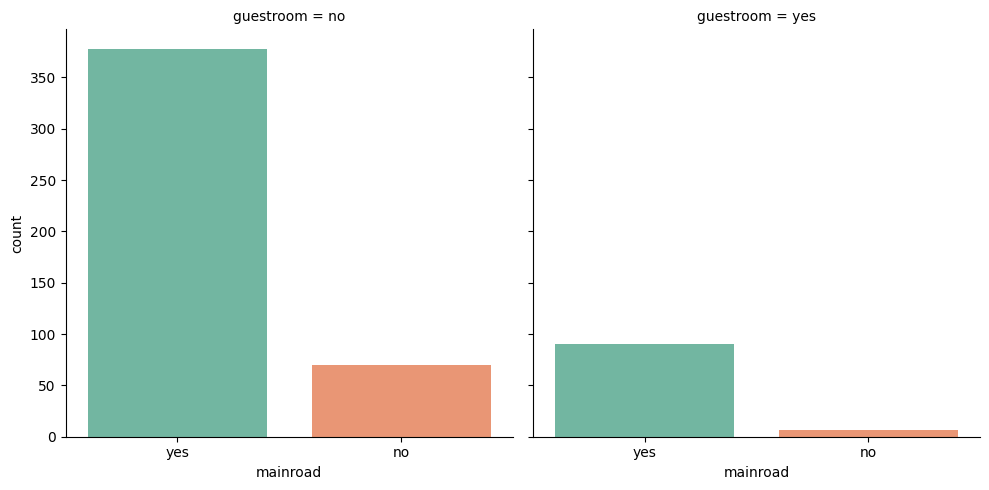

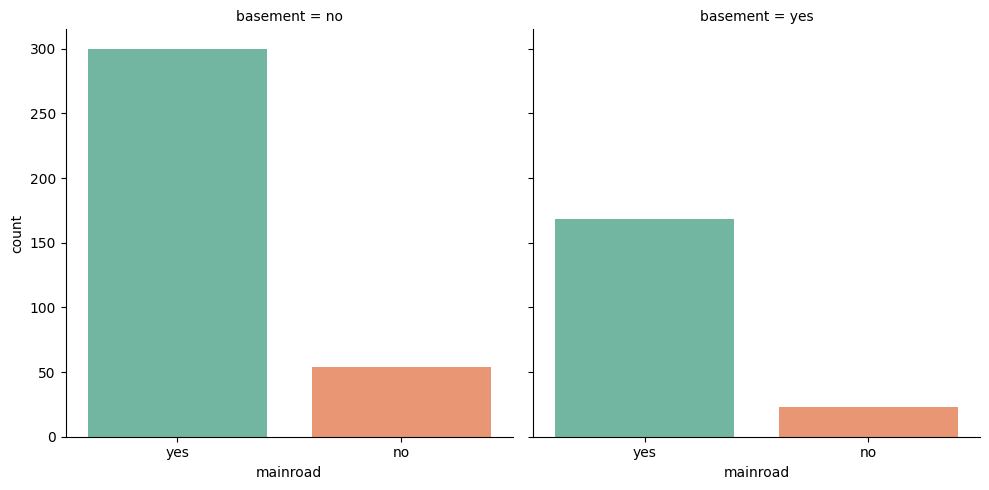

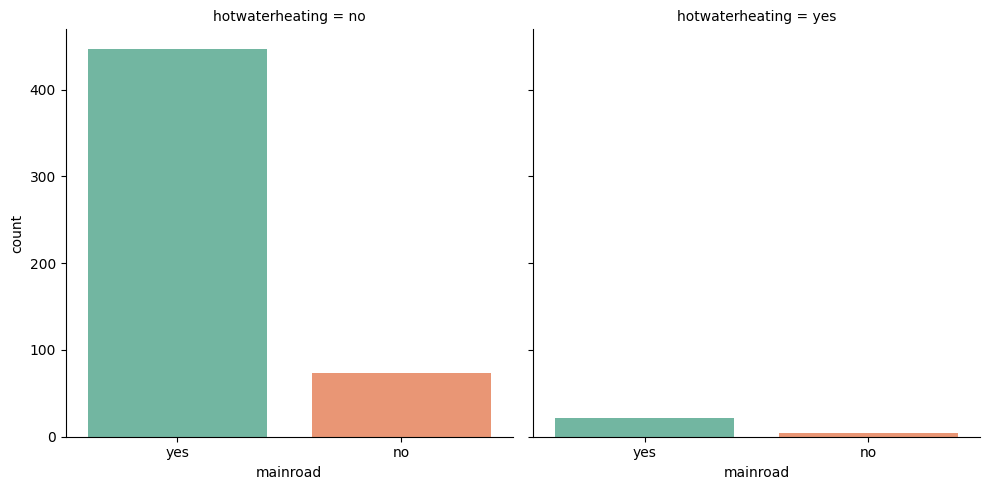

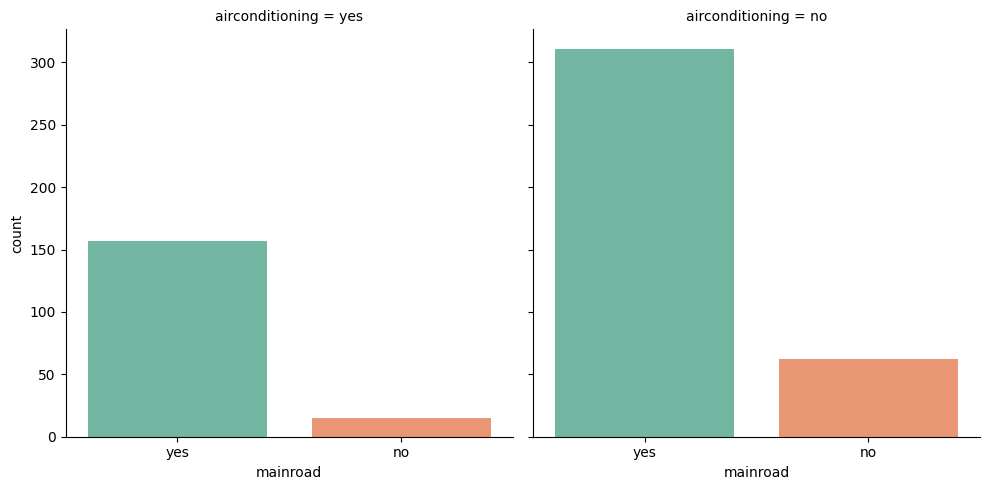

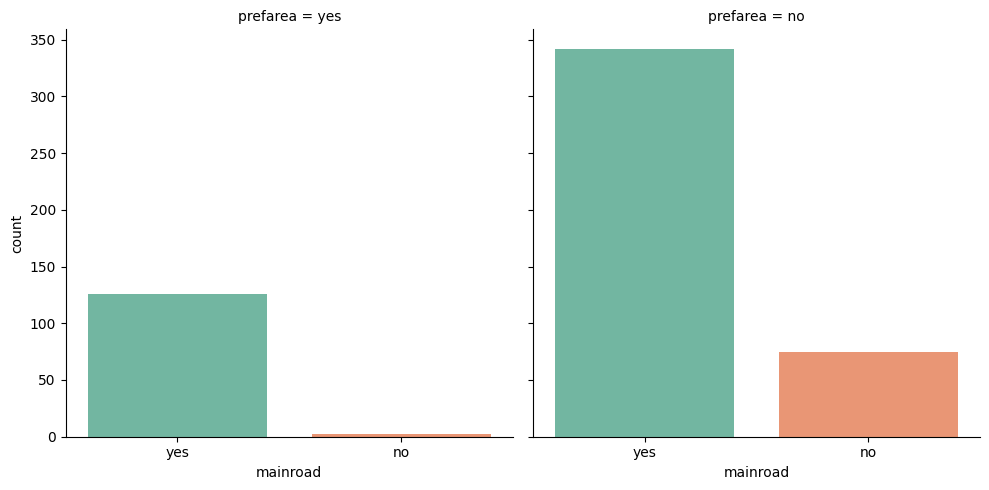

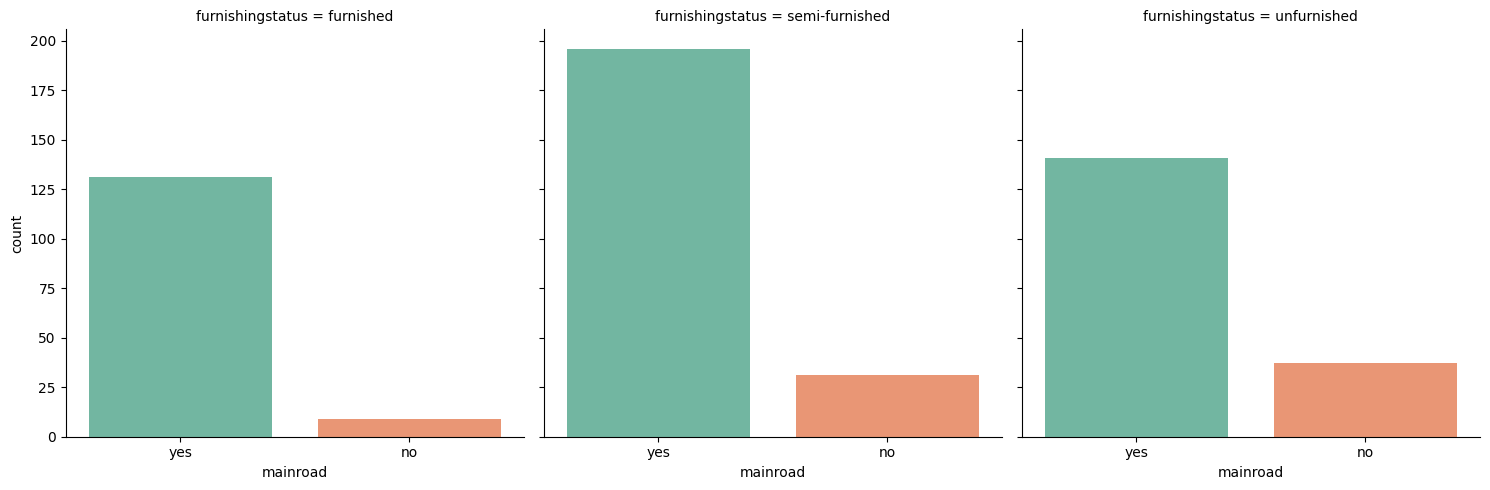

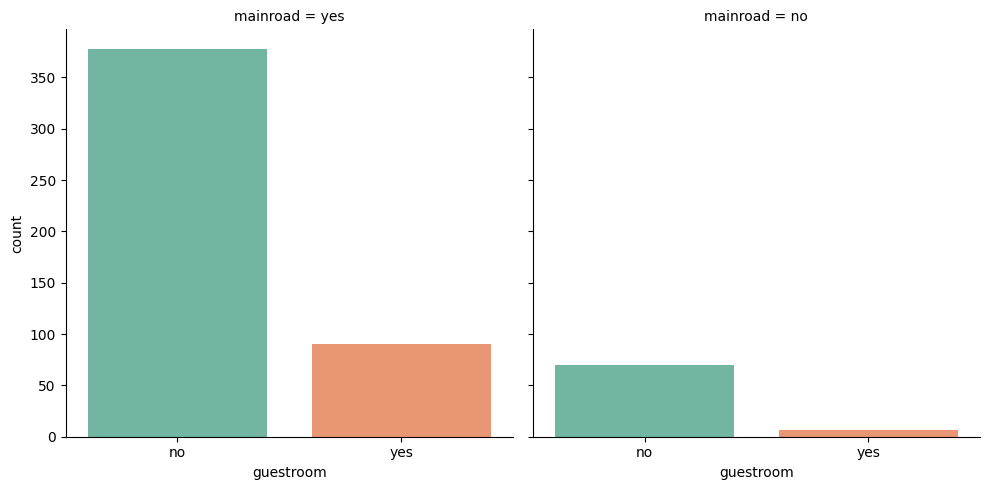

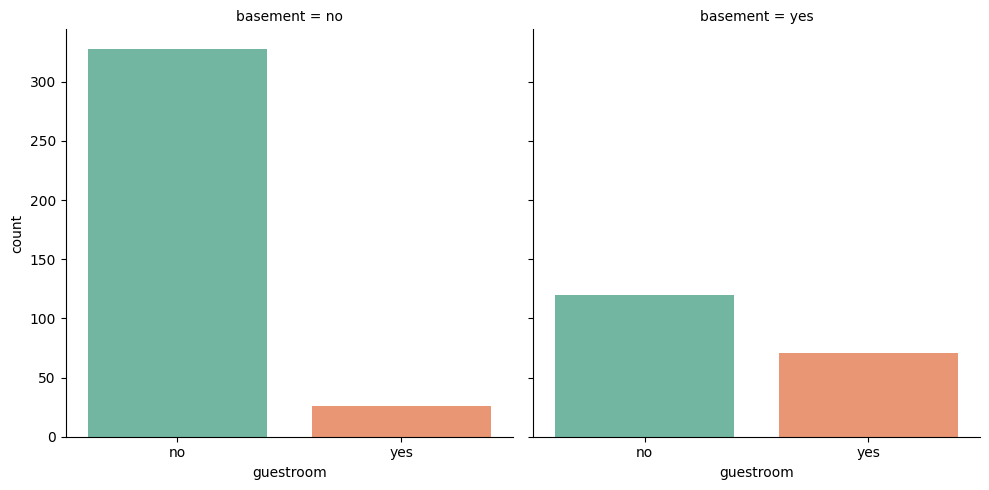

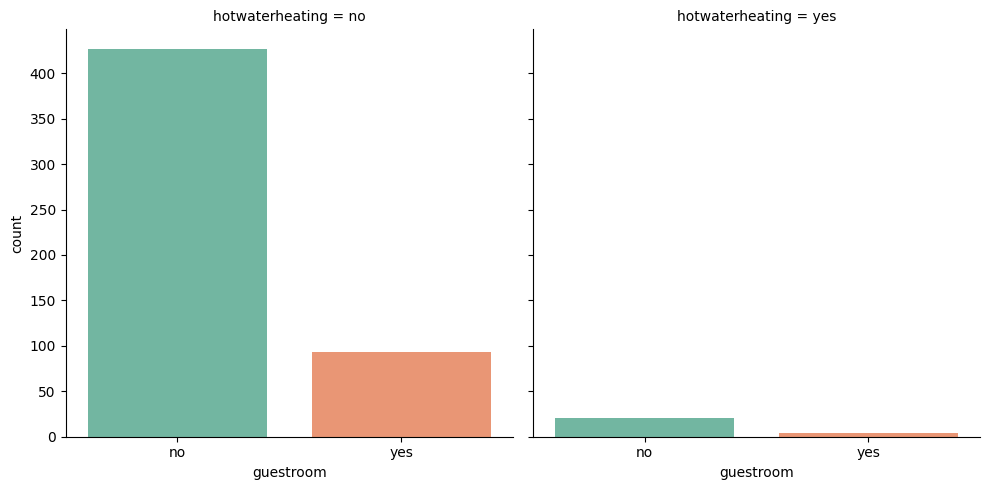

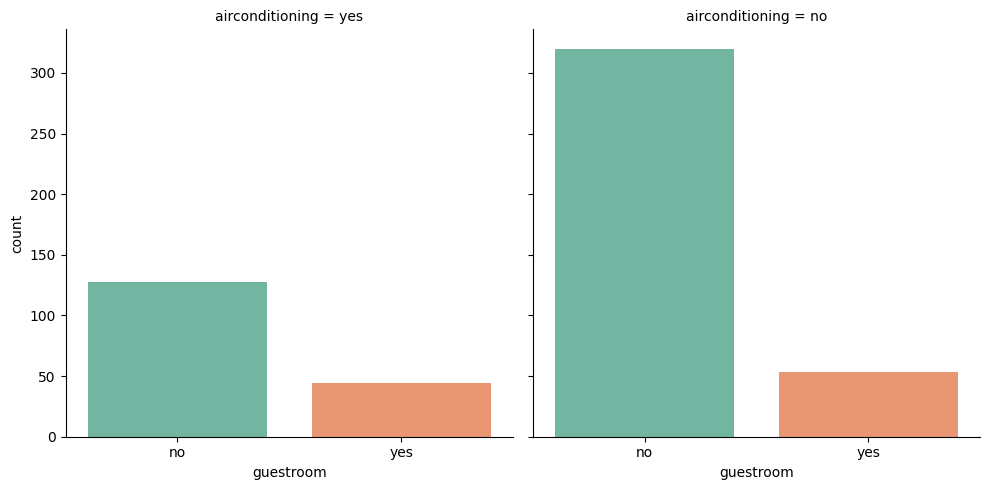

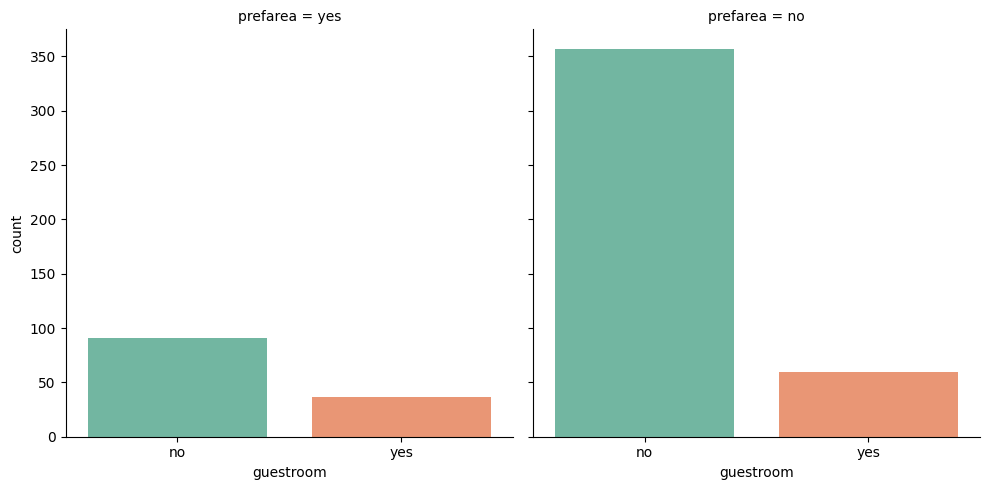

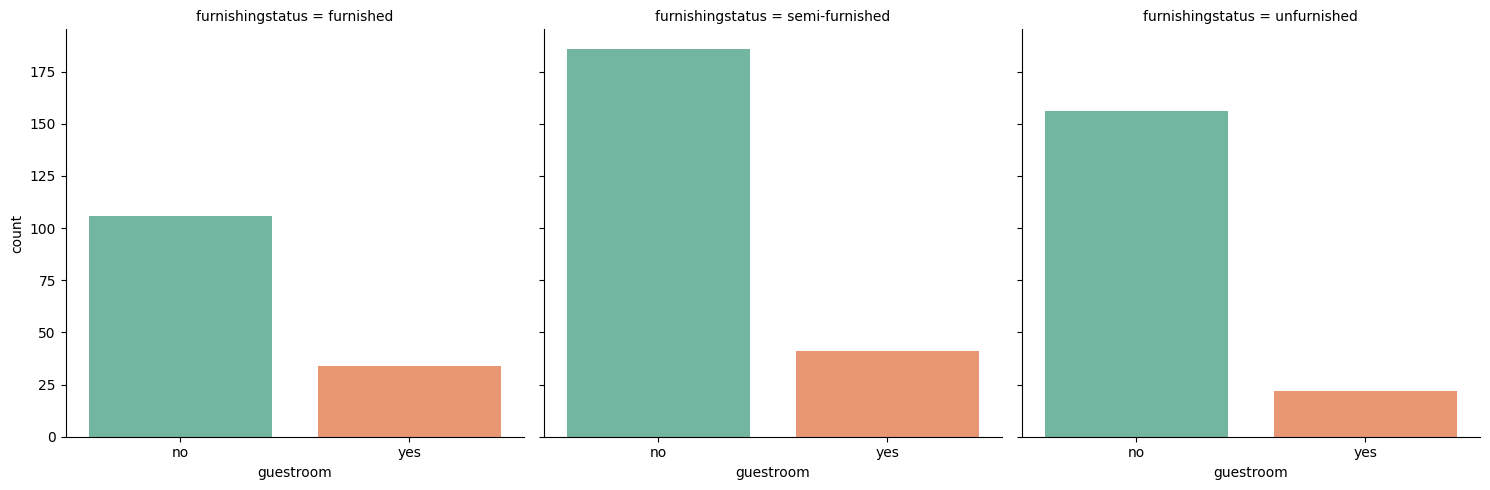

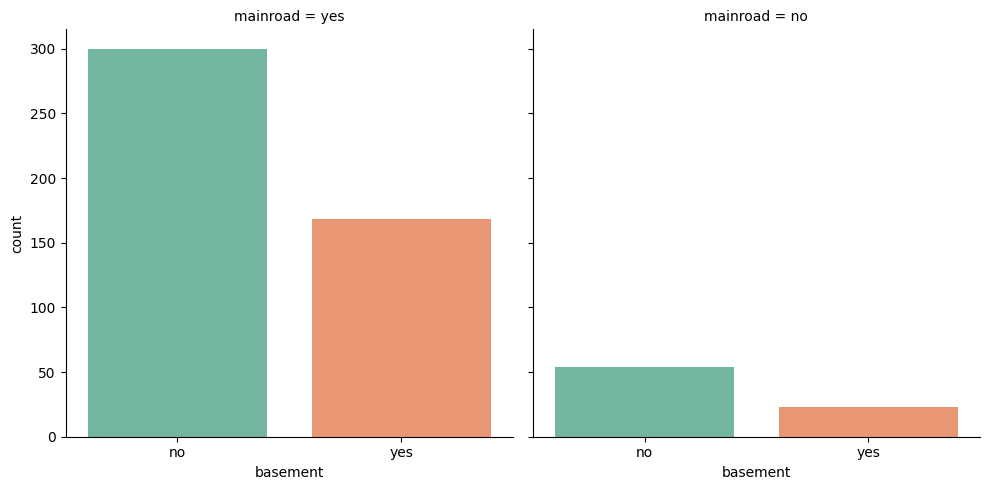

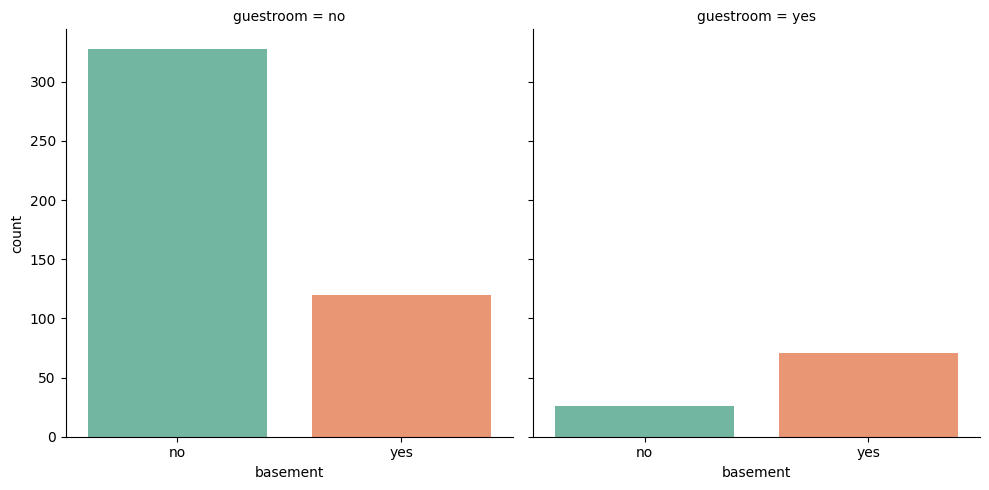

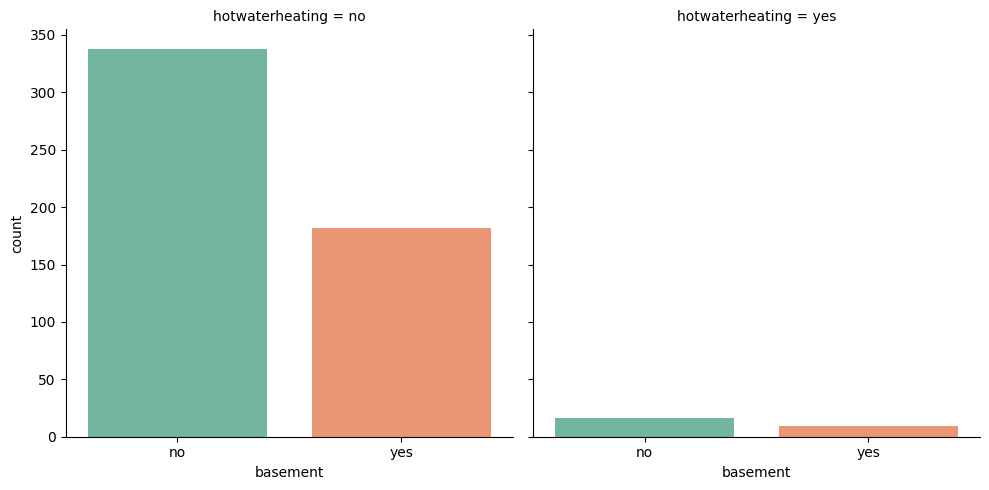

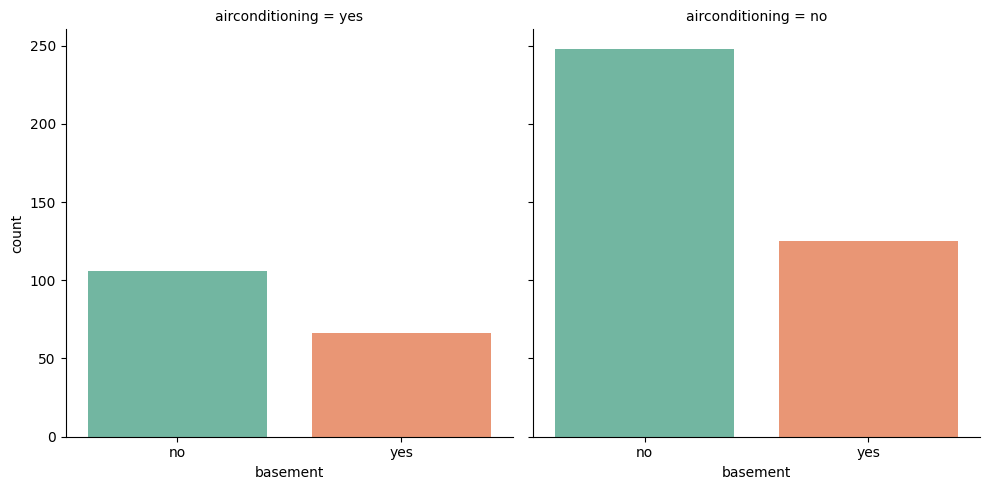

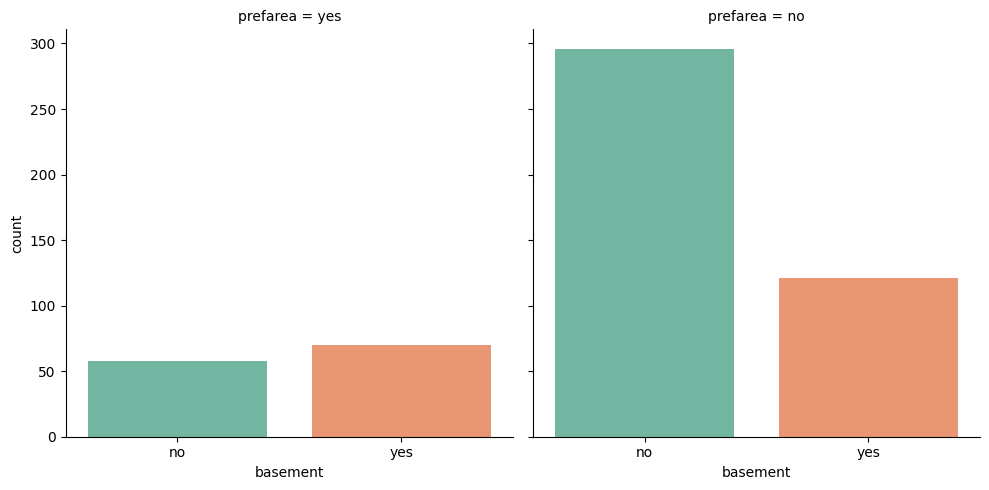

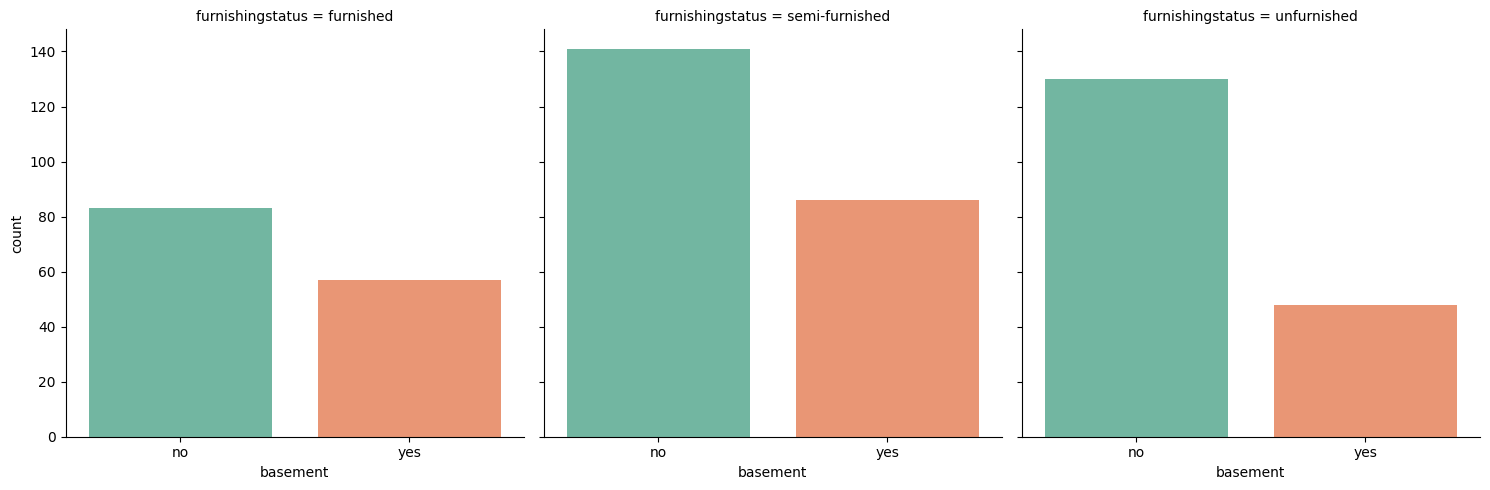

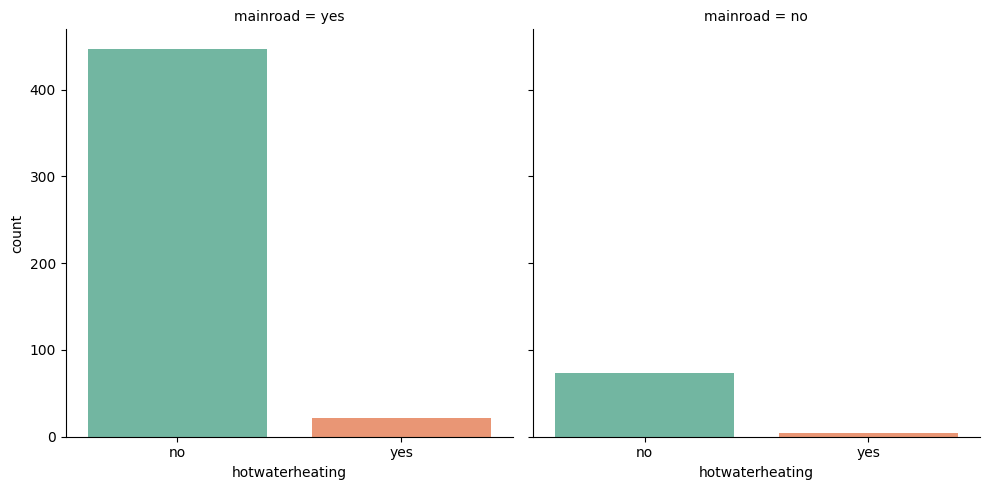

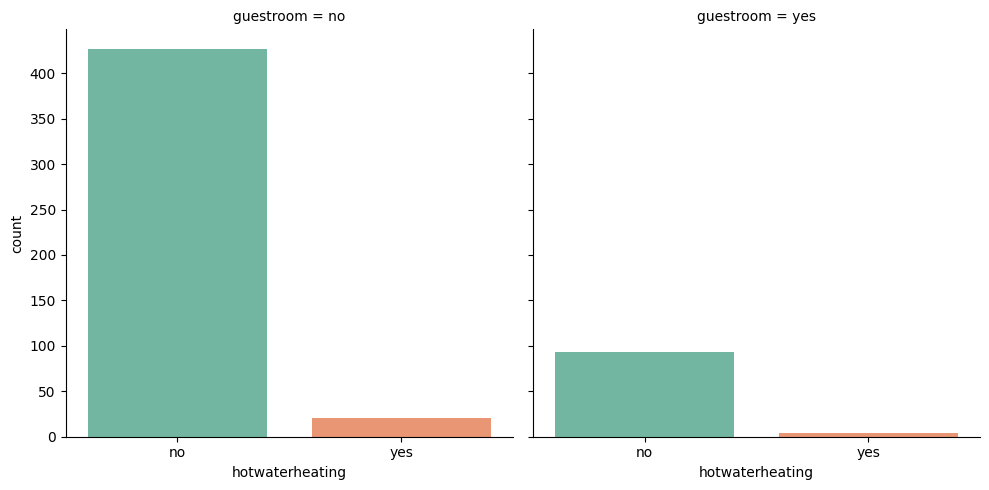

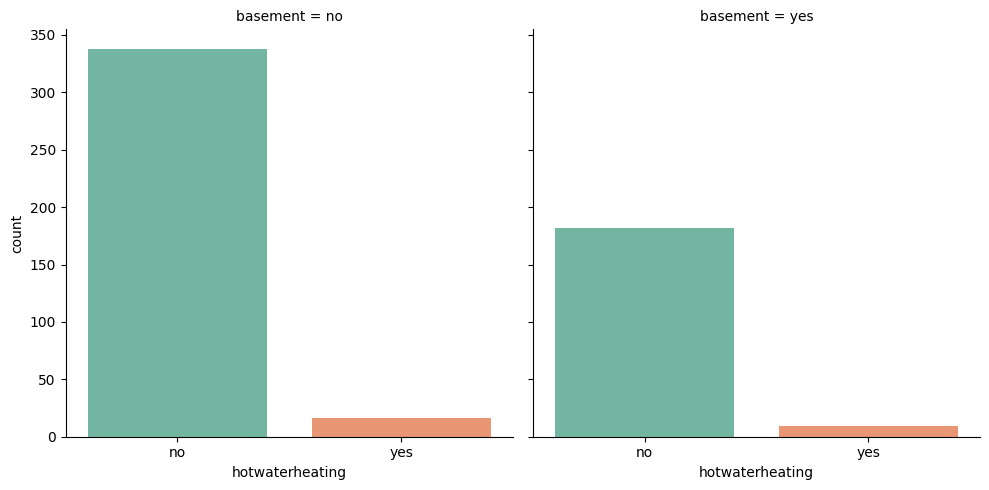

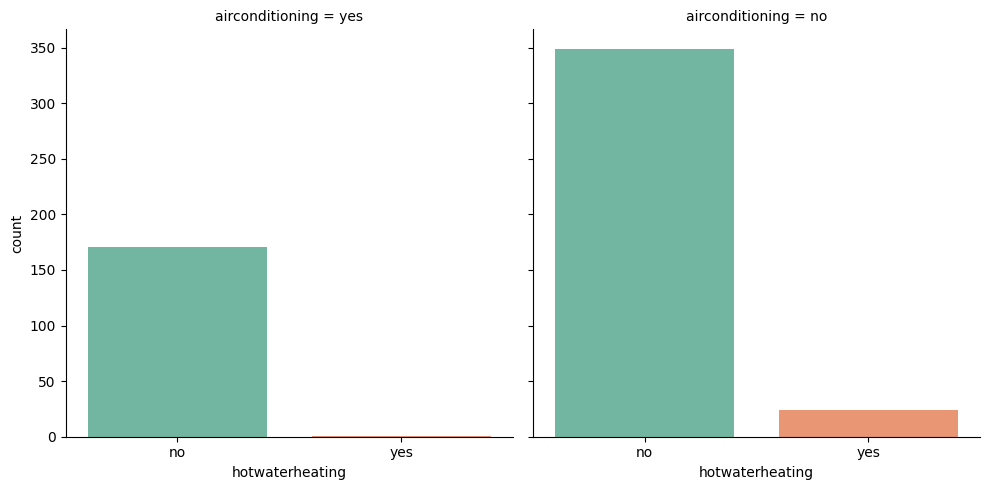

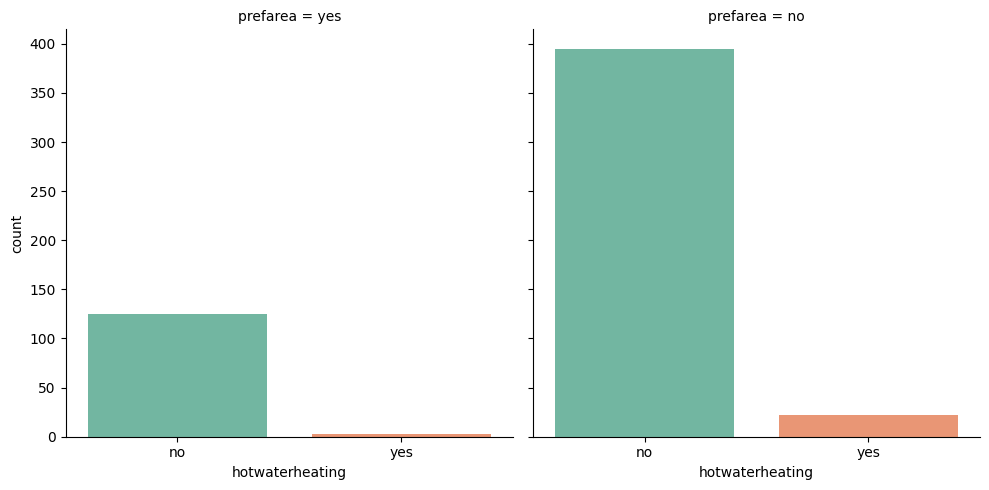

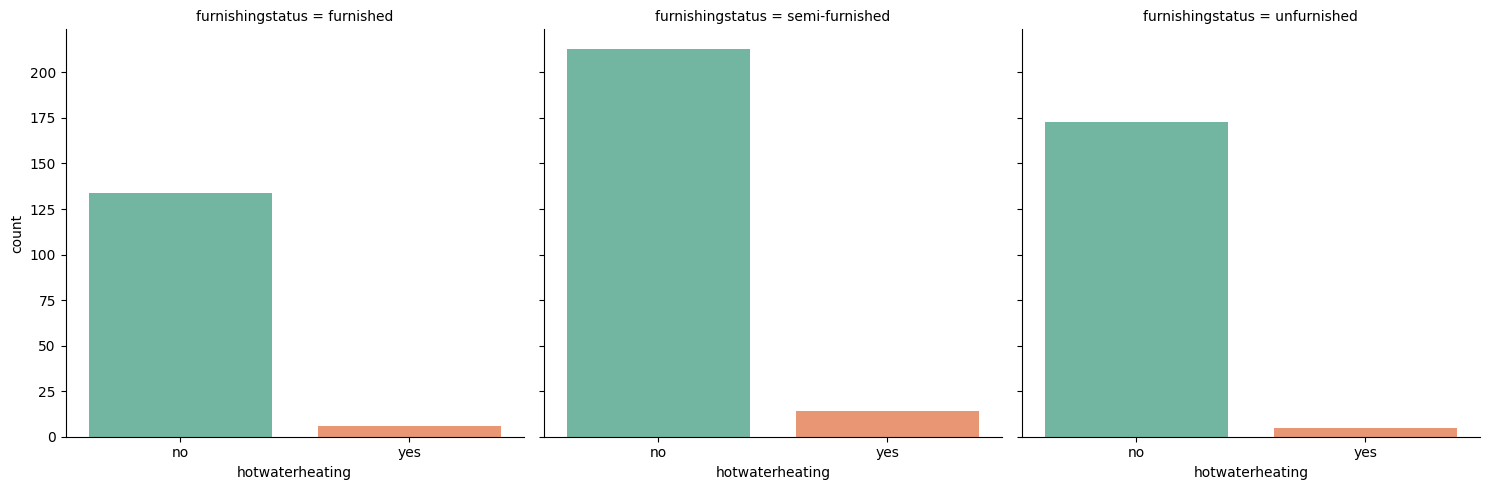

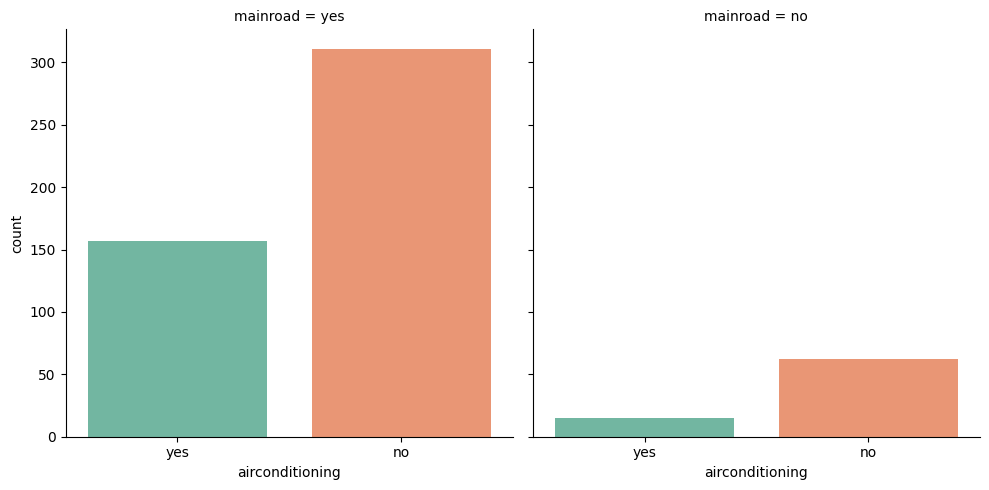

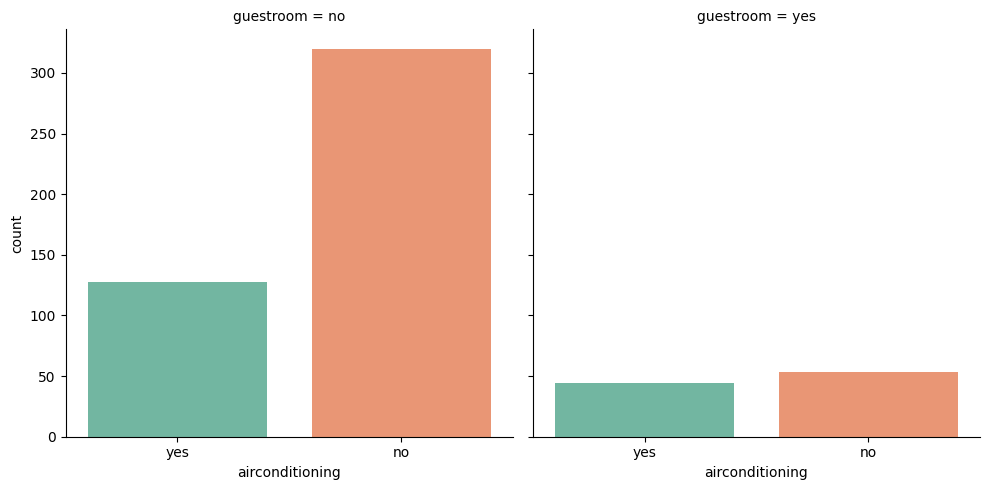

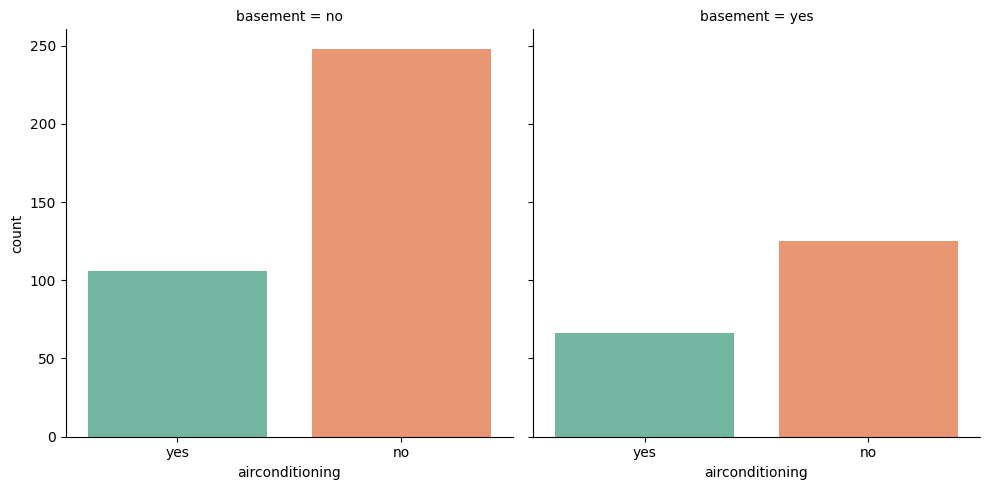

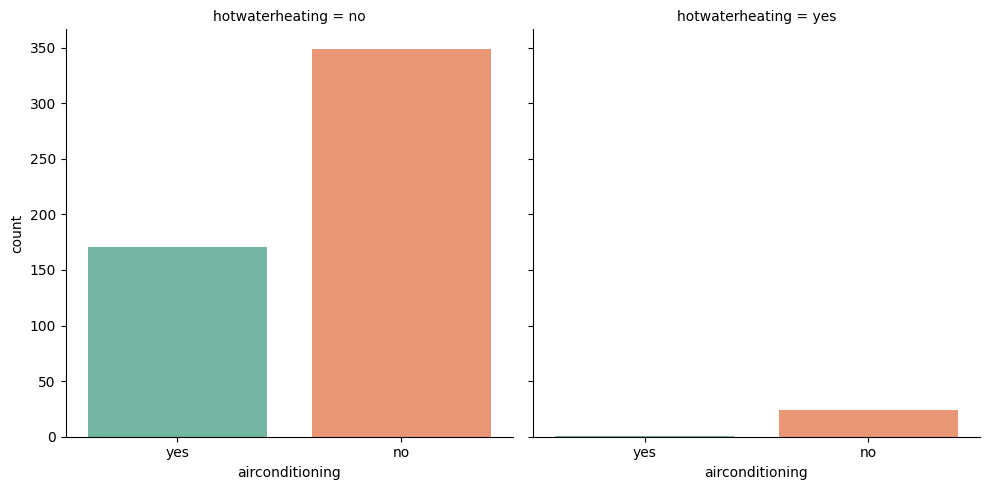

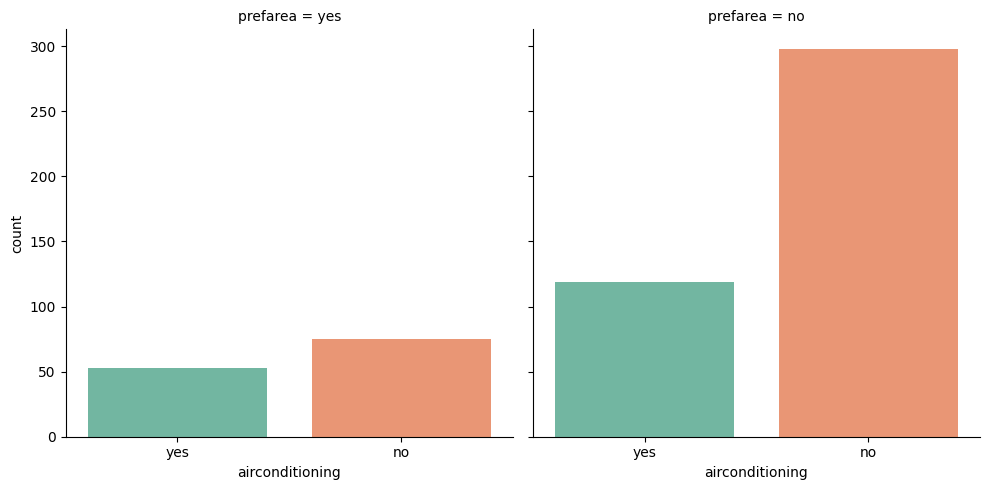

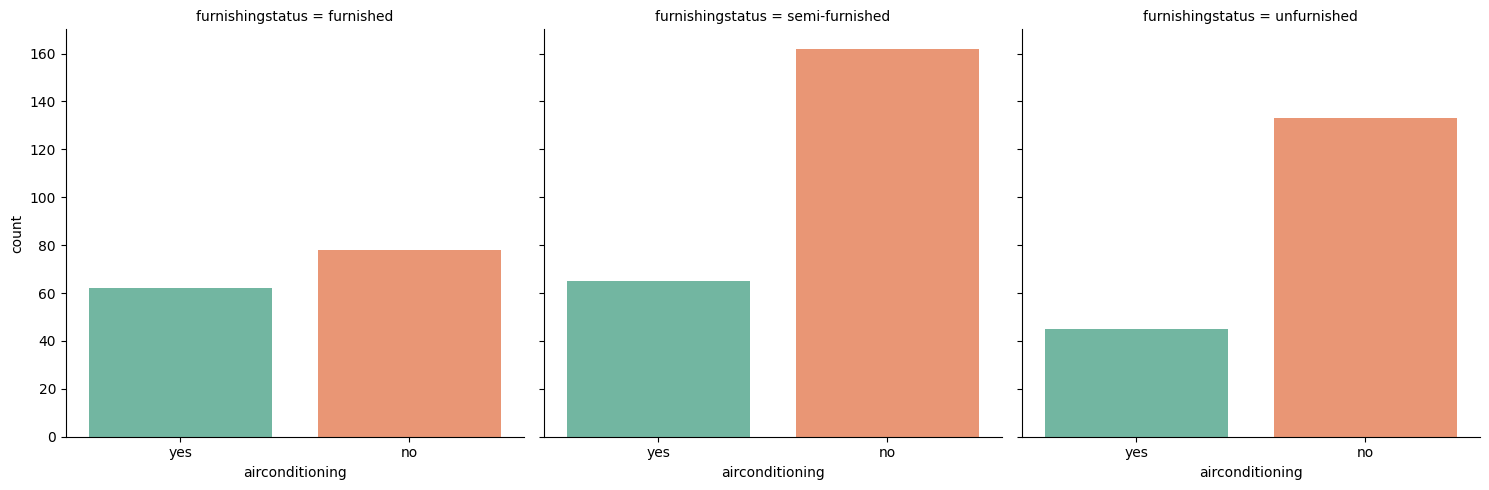

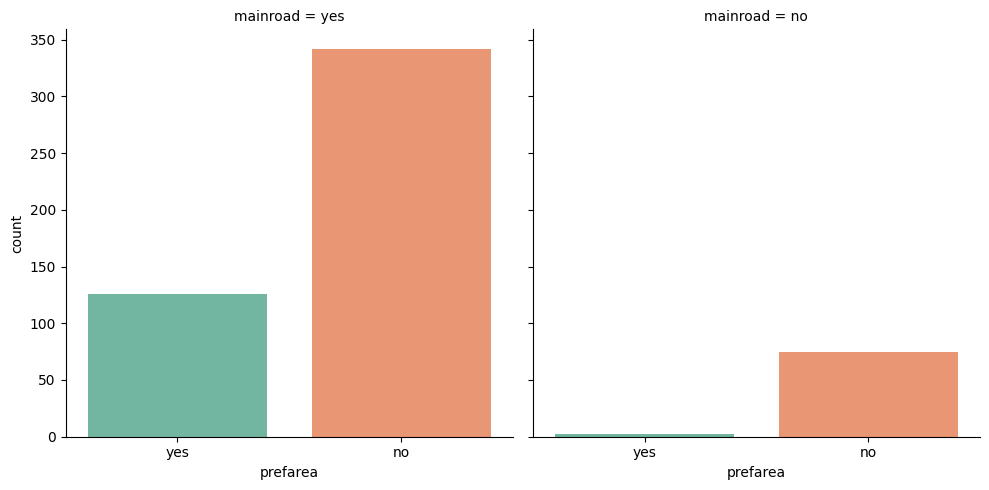

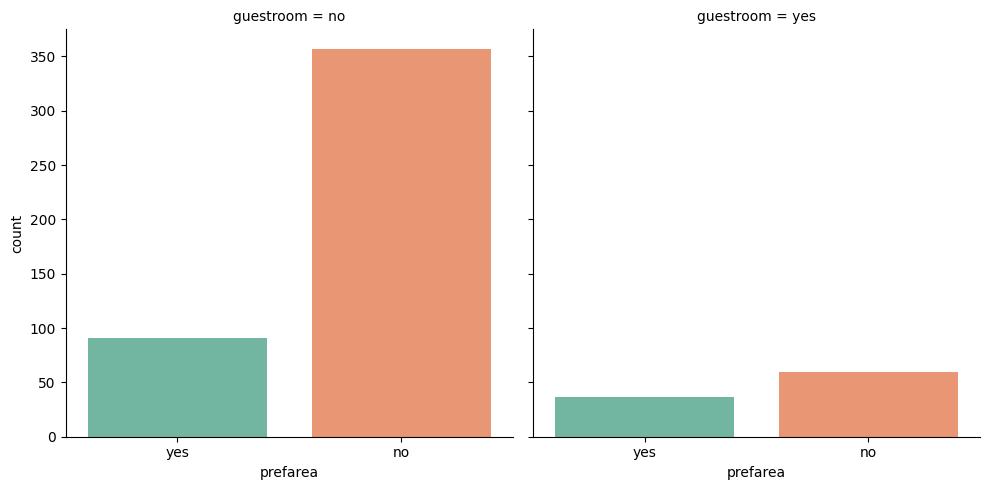

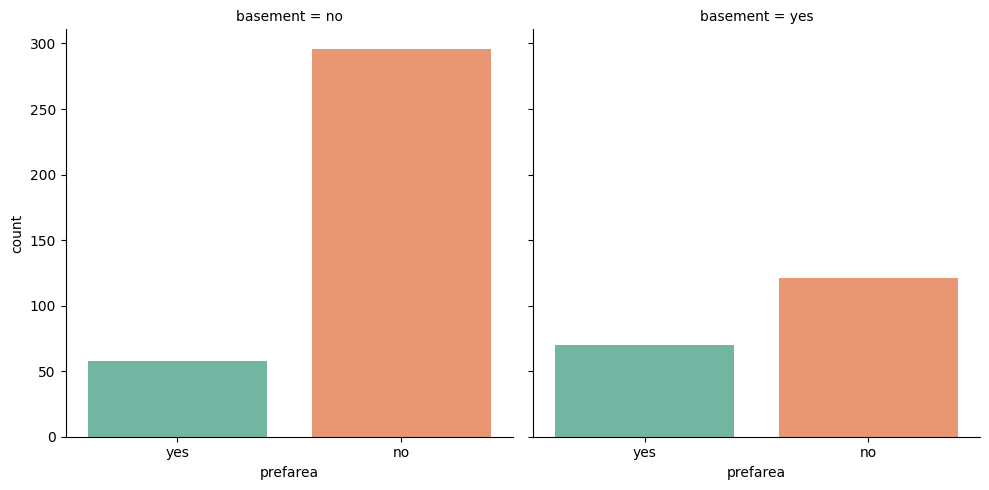

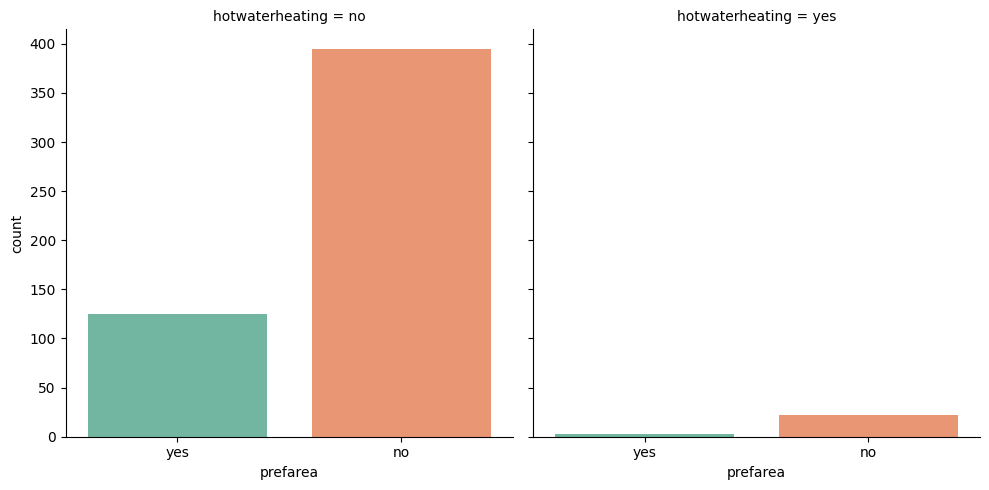

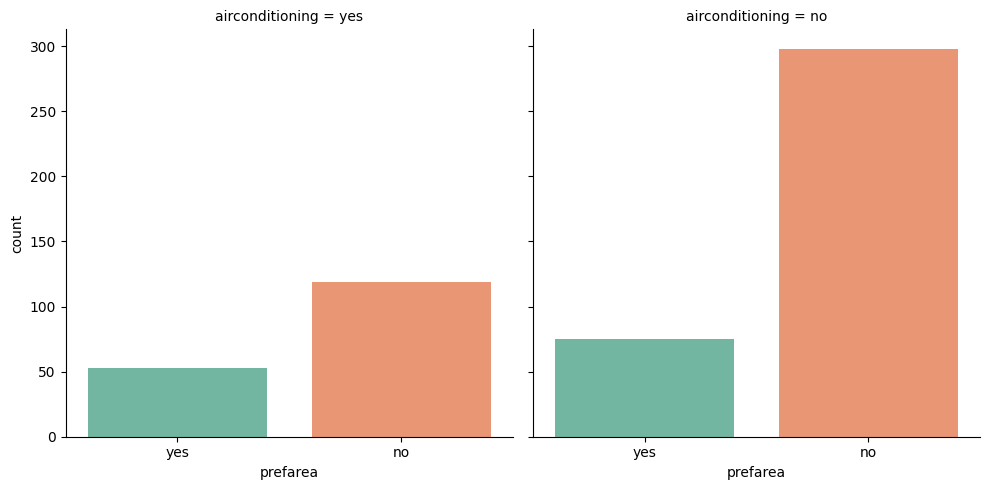

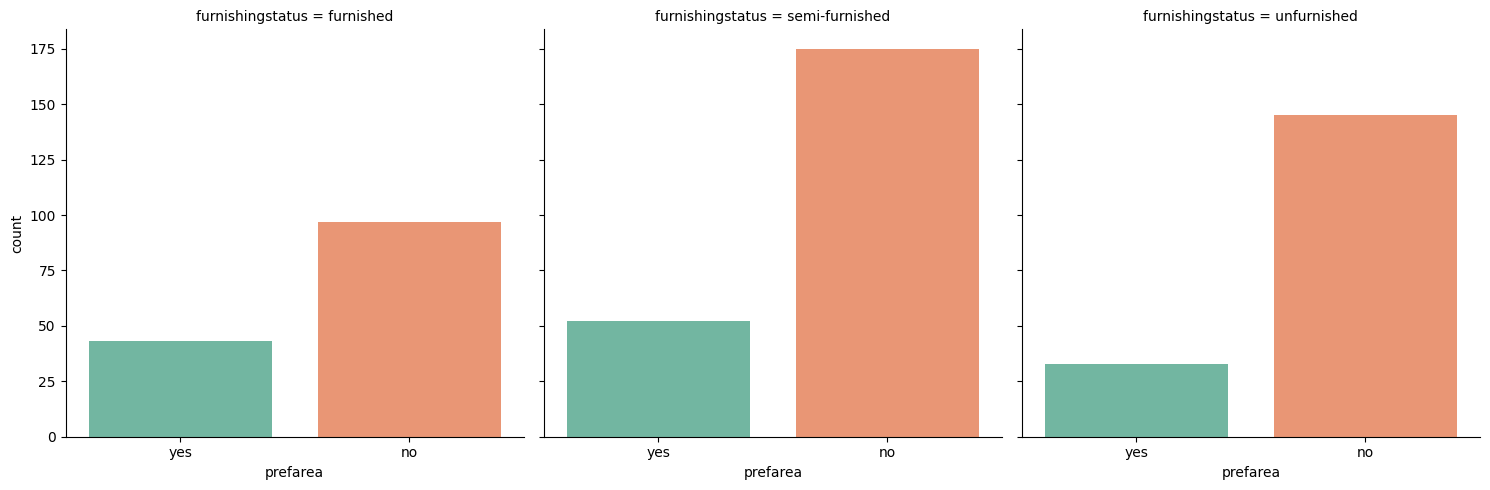

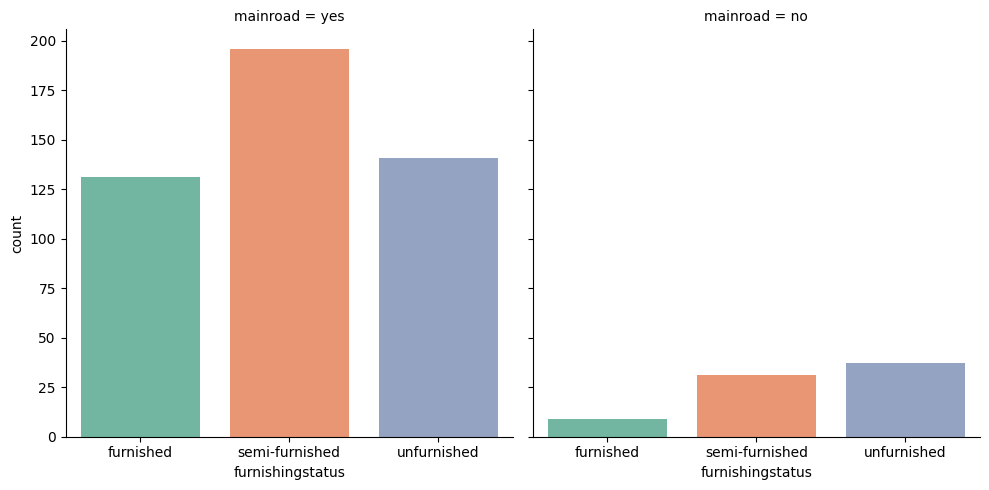

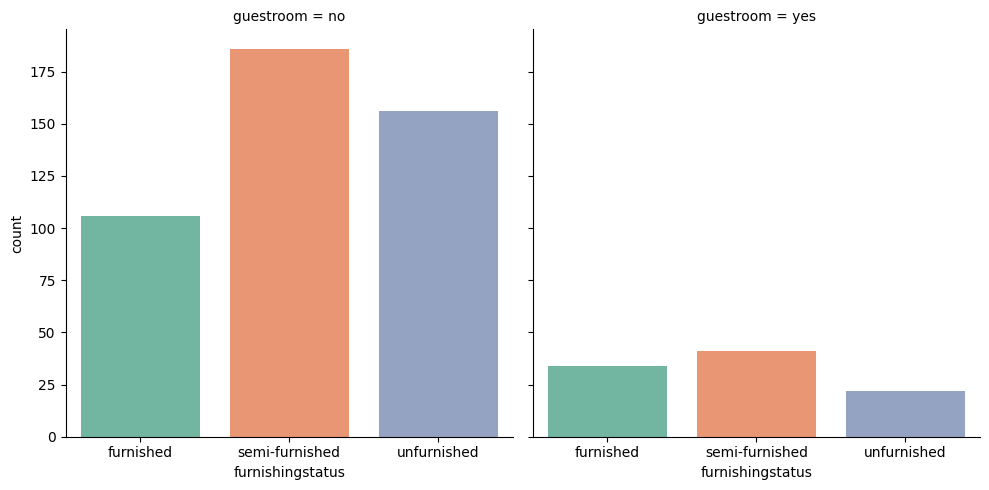

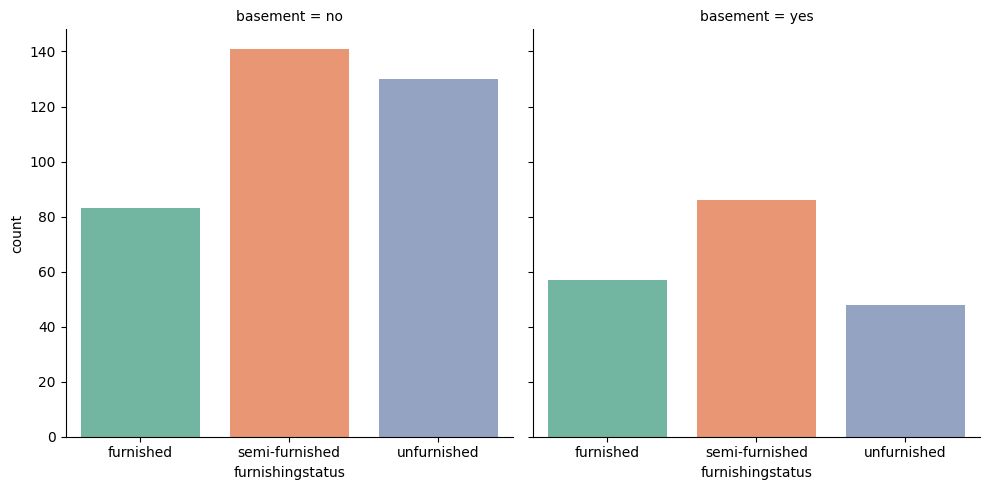

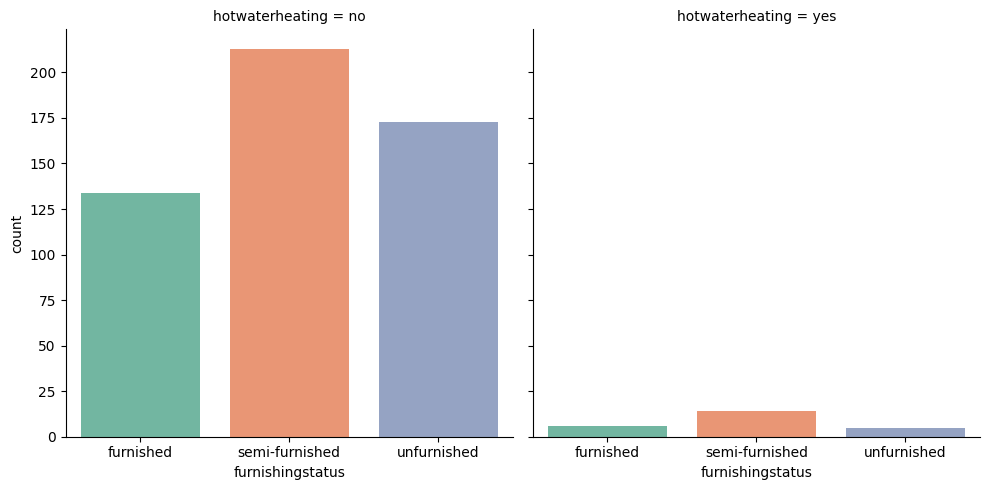

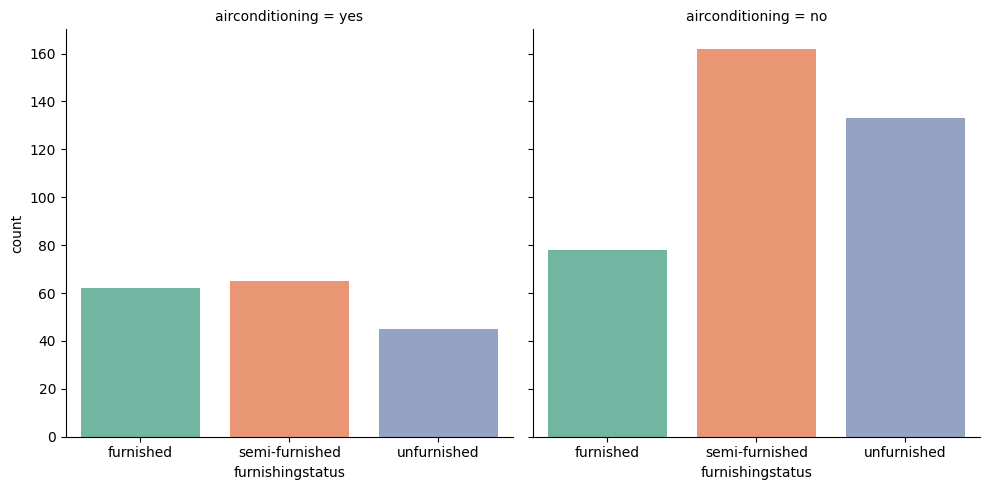

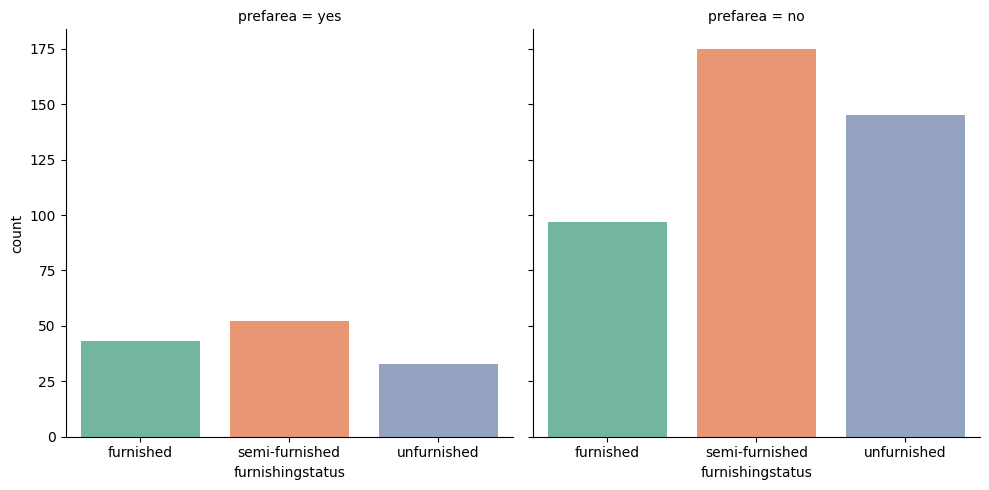

In [ ]:
for categ in categorical_features:
    for categ2 in categorical_features:
        if categ == categ2:
            continue
        # Show bar plot of categ in relation to categ2
        sns.catplot(x=categ, col=categ2, data=X, kind='count',palette='Set2')
        plt.show()

As in the analysis of the relationship between quantitative and qualitative variables, no significant correlation was found between the qualitative variables since most of the categorical variables are of binary type and the distribution is not balanced between the two categories.

# Analysis of the statistical between X and Y

Text(0.5, 1.0, 'Correlation of numerical features to price')

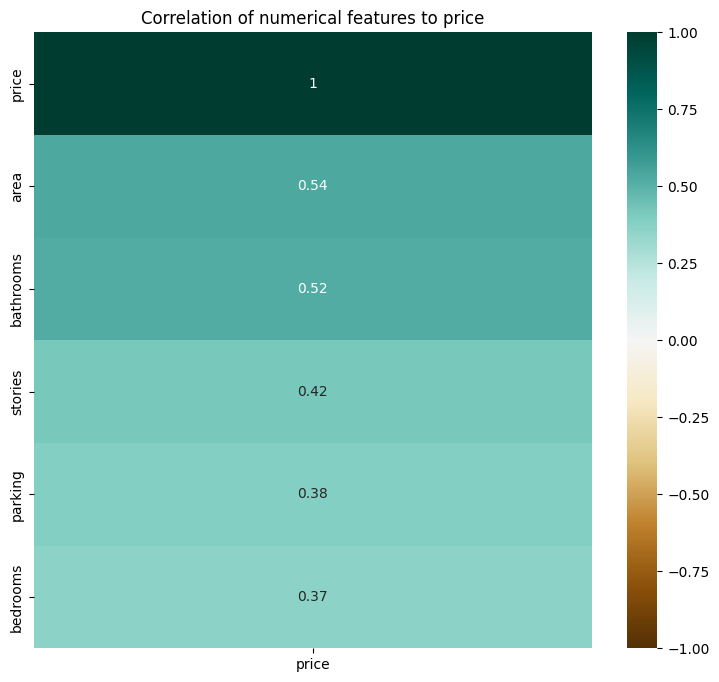

In [ ]:
plt.figure(figsize=(9, 8))
sns.heatmap(df.select_dtypes(exclude=['object']).corr()[['price']]
            .sort_values(by='price', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title('Correlation of numerical features to price')

We notice that the quantitative variables most correlated with the price, the area and the number of bedrooms, which is totally logical.

We have already seen that the number of bedrooms increases with the area of ​​the house and it is logical that the larger the house (large area) the more the price increases.

The variables parking and bedrooms are not strongly correlated with the price.

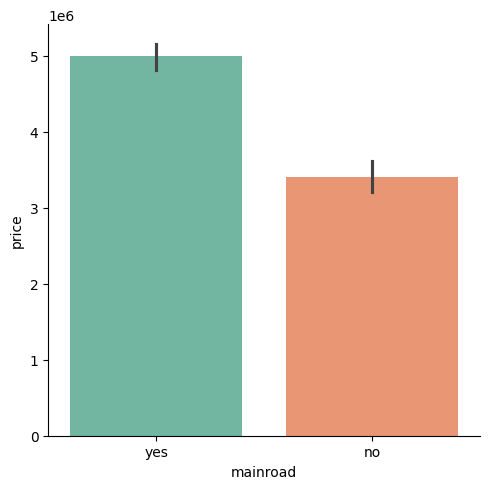

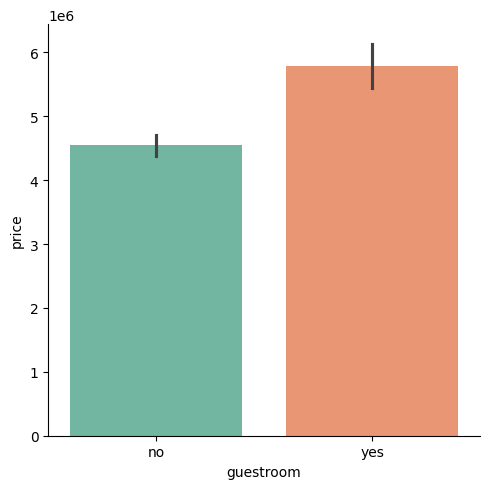

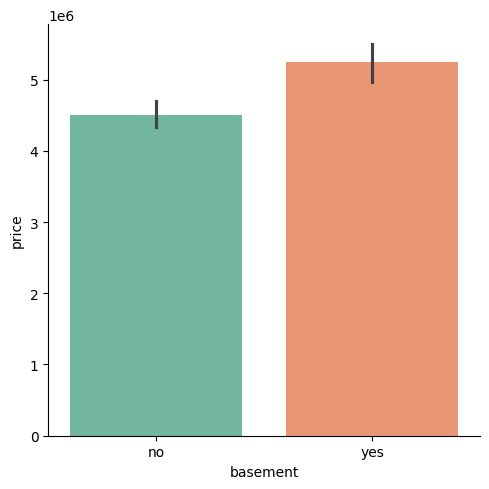

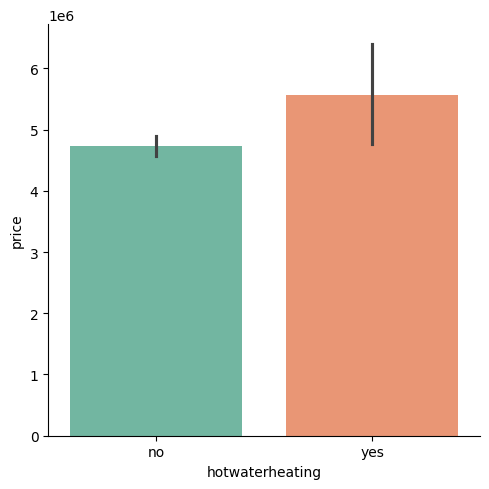

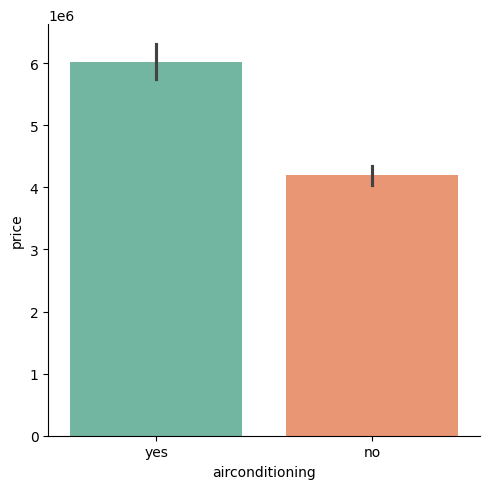

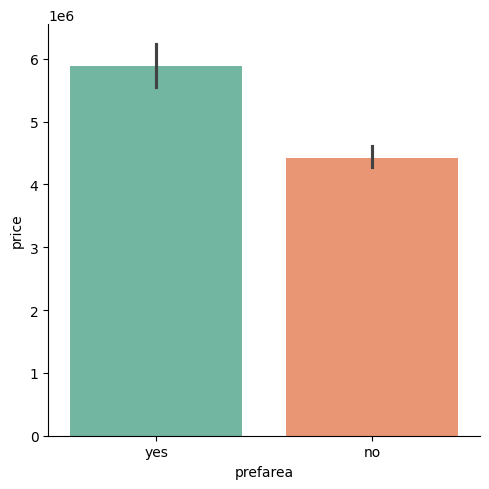

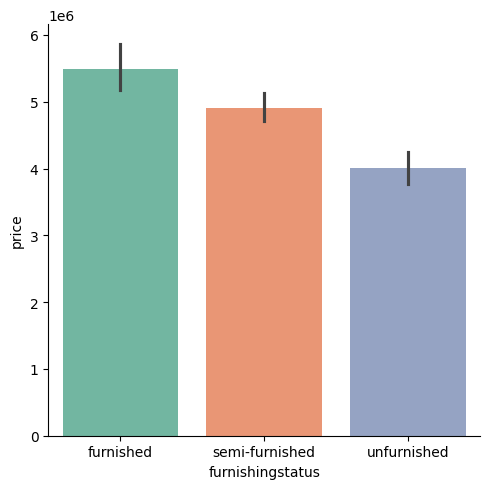

In [ ]:
for categ in categorical_features:
    sns.catplot(x=categ, y='price', data=df, kind='bar',palette='Set2')
    plt.show()

The results obtained are consistent with the hypotheses formulated previously. The more options the house has (such as air conditioning, heating, etc.), the higher the price.

# Modeling

In [ ]:
#one hot encoding for furnishingstatus, since it has 3 unique values
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish', dtype=int)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0,0


In [ ]:
# Converting categorical data into numerical data
binary_col = [ 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in binary_col:
    df[i] = df[i].map({'yes': 1, 'no' : 0}).fillna(0)

<Axes: >

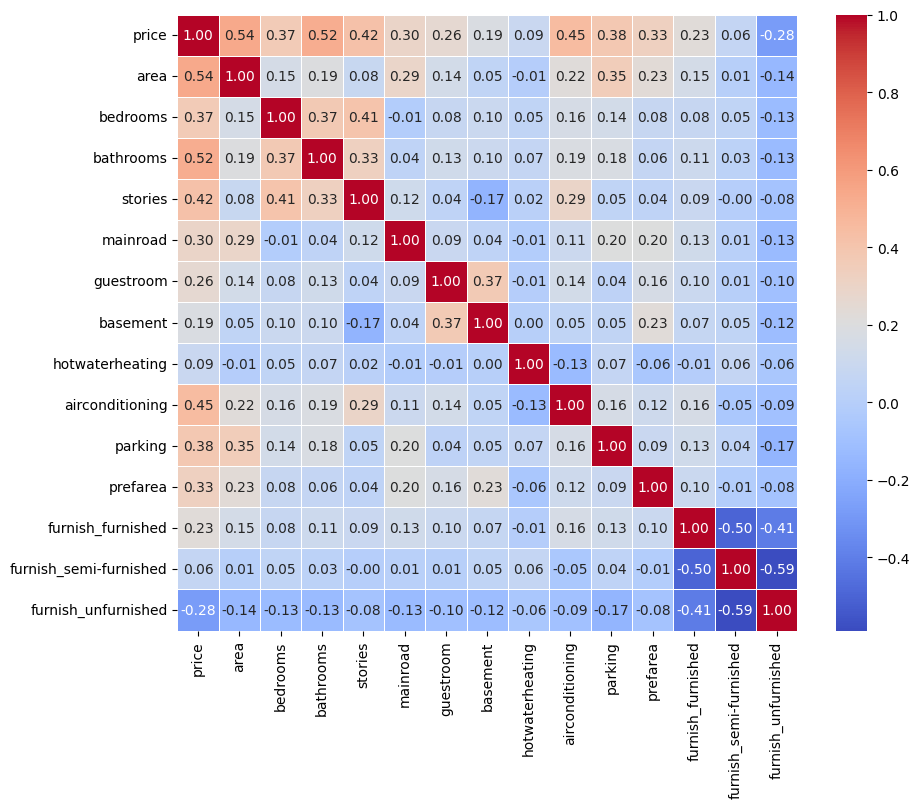

In [ ]:
# Corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
# Correlation
df_copy = df.copy()
corr_df = df_copy.corr()
corr_df =corr_df.drop(['price'], axis=0 )
print("Correlation between Target variable(price) and other variables: ")
print(corr_df['price'])

Correlation between Target variable(price) and other variables: 
area                      0.535997
bedrooms                  0.366494
bathrooms                 0.517545
stories                   0.420712
mainroad                  0.296898
guestroom                 0.255517
basement                  0.187057
hotwaterheating           0.093073
airconditioning           0.452954
parking                   0.384394
prefarea                  0.329777
furnish_furnished         0.229350
furnish_semi-furnished    0.063656
furnish_unfurnished      -0.280587
Name: price, dtype: float64


In [ ]:
# Preparing dataset

X = df.drop(['price'], axis=1) #independent_var
y = df['price'] #target or dependent

print("Shape of X(independent variable): ", X.shape)
print("Shape of y(dependent variable): ", y.shape)

Shape of X(independent variable):  (545, 14)
Shape of y(dependent variable):  (545,)


In [ ]:
# split data into training set, cross validation set and test set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 32)


print(f"Size of X_train {X_train.shape}")
print(f"Size of y_train {y_train.shape}")

print(f"Size of X_test {X_test.shape}")
print(f"Size of y_test {y_test.shape}")

Size of X_train (327, 14)
Size of y_train (327,)
Size of X_test (218, 14)
Size of y_test (218,)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost(xg)': XGBRegressor(objective='reg:squarederror', random_state=42)

}


In [ ]:
# Initialize an empty dictionary to store model performances
model_performance = {}

# Train each model and store evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_performance[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }
    print(f'--- {name} ---')
    print(f"MAE: {model_performance[name]['MAE']}")
    print(f"RMSE: {model_performance[name]['RMSE']}")
    print(f"R2 Score: {model_performance[name]['R2 Score']}\n")

# Extract R² scores for specific models
r2_lr = model_performance.get('Linear Regression', {}).get('R2 Score', None)
r2_dt = model_performance.get('Decision Tree', {}).get('R2 Score', None)
r2_rf = model_performance.get('Random Forest', {}).get('R2 Score', None)
r2_xg = model_performance.get('XGBoost(xg)', {}).get('R2 Score', None)


# Store in a list
r2 = [r2_lr, r2_dt, r2_rf,r2_xg]




--- Linear Regression ---
MAE: 791655.1937519353
RMSE: 1045731.6468459262
R2 Score: 0.6901742022770387

--- Decision Tree ---
MAE: 1072300.4587155962
RMSE: 1481092.1461509098
R2 Score: 0.3784998581201121

--- Random Forest ---
MAE: 811446.5263761468
RMSE: 1117897.7078989965
R2 Score: 0.6459364613823124

--- XGBoost(xg) ---
MAE: 879354.875
RMSE: 1220591.355591215
R2 Score: 0.5778977870941162



In [ ]:
print(r2_xg)

0.5778977870941162


 1.R² Score (Higher is Better)
*  Linear Regression (0.65) performed the best, indicating it explains the highest variance in house prices.
* Random Forest (0.64) is close to Linear Regression, suggesting it is also a strong model.
* XGBoost (0.53) performed slightly worse but still reasonable.
* Decision Tree (0.38) had the lowest R², meaning it struggled with generalization.

2.RMSE (Lower is Better)
* Linear Regression (1,062,181) had the lowest RMSE, meaning its predictions were closer to actual values.
* Random Forest (1,079,387) is slightly worse but still competitive.
* XGBoost (1,229,968) shows a higher RMSE, indicating more deviation in predictions.
* Decision Tree (1,410,187) performed the worst, with the highest RMSE.

3.MAE (Lower is Better)
* Random Forest (784,348) achieved the lowest MAE, suggesting it made the least absolute errors.
* Linear Regression (821,239) followed closely behind.
* XGBoost (879,556) performed worse.
* Decision Tree (1,040,977) had the highest error, showing it overfits training data and generalizes poorly.
### Conclusion
* Linear Regression performed the best overall in terms of R² and RMSE.
* Random Forest was very close and had the best MAE.
* XGBoost was not as good as expected, but hyperparameter tuning improved it slightly.
* Decision Tree performed the worst across all metrics, likely due to overfitting.

# Feature Engineering

Improving the model by adding more features

In [ ]:
# Adding Features:: Feature Engineering

X['large_house'] = ((X['bedrooms']>=3) & (X['bathrooms']>=2)).astype(int)

X['total_bed_bath'] = X['bedrooms']+X['bathrooms']

X['luxury_score'] = X["airconditioning"] + X["hotwaterheating"] + X["guestroom"] + X["furnish_furnished"]*1 + X["furnish_semi-furnished"]*0.5

X['comfort'] = X[['airconditioning','hotwaterheating', 'prefarea' ]].sum(axis=1)

X['space_capacity'] = X[['basement', 'guestroom', 'parking', 'stories','bedrooms', 'bathrooms']].sum(axis=1)

X['accessibility'] = X[['mainroad', 'parking']].sum(axis=1)

X['total_rooms'] = X[['bedrooms', 'bathrooms', 'guestroom', 'basement']].sum(axis=1)

X['amenities'] = X[['airconditioning','hotwaterheating','guestroom','basement']].sum(axis=1)

X['space_per_rooms'] = X['area']/X['total_rooms']

X['bathroom_parking'] = X['bathrooms'] * X['parking']

X['bedroom_parking'] = X['bedrooms'] * X['parking']

X['accessibility_score'] = X['mainroad']*X['parking']*X['prefarea']

X['basement_heating'] = X["basement"] * X["hotwaterheating"]

X['total_utilities'] = X["airconditioning"] + X["hotwaterheating"] + X["basement"]

In [ ]:
print("Shape of the new dataset with added features:", X.shape)
print(X.shape)
print("Column list: \n", X.columns.tolist())

Shape of the new dataset with added features: (545, 28)
(545, 28)
Column list: 
 ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnish_furnished', 'furnish_semi-furnished', 'furnish_unfurnished', 'large_house', 'total_bed_bath', 'luxury_score', 'comfort', 'space_capacity', 'accessibility', 'total_rooms', 'amenities', 'space_per_rooms', 'bathroom_parking', 'bedroom_parking', 'accessibility_score', 'basement_heating', 'total_utilities']


In [ ]:
pd.set_option('display.max_columns', None)

print(df_copy.tail(5))


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnish_furnished  \
540                0                0        2         0                  0   
541                0                0        0         0                  0   
542                0                0        0         0                  0   
543                0                0        0         0                  1   
544                0                0        0         0                  0   

     furnish_semi-furnished  furnish_unfurnished  large_house  total_bed_bath  \

In [ ]:
# Correlation matrix for the new dataframe
df_copy = X.copy()
df_copy['price'] = df['price']
corr_df = df_copy.corr()
corr_df =corr_df.drop(['price'], axis=0 )
# print("Correlation between Target variable(price) and other variables: ")
# print(corr_df['price'])

sorted_corr = corr_df['price'].sort_values(ascending=False)
print("Correlation between Target variable(price) Sorted ")
print(sorted_corr)

Correlation between Target variable(price) Sorted 
space_capacity            0.670119
comfort                   0.551300
luxury_score              0.543760
area                      0.535997
total_rooms               0.535386
large_house               0.519730
bathrooms                 0.517545
total_bed_bath            0.511809
bathroom_parking          0.507256
amenities                 0.462278
total_utilities           0.458868
airconditioning           0.452954
bedroom_parking           0.444058
accessibility             0.437619
stories                   0.420712
parking                   0.384394
bedrooms                  0.366494
accessibility_score       0.348018
prefarea                  0.329777
mainroad                  0.296898
guestroom                 0.255517
furnish_furnished         0.229350
basement                  0.187057
basement_heating          0.132261
space_per_rooms           0.130815
hotwaterheating           0.093073
furnish_semi-furnished    0.063656
furn

In [ ]:
# split data into training set, cross validation set and test set
X_train,X_, y_train, y_ = train_test_split(X, y, test_size = 0.4, random_state = 32)

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 32)

column_names = X_train.columns

print(f"Size of X_train {X_train.shape}")
print(f"Size of y_train {y_train.shape}")
print(f"Size of X_cv {X_cv.shape}")
print(f"Size of y_cv {y_cv.shape}")
print(f"Size of X_test {X_test.shape}")
print(f"Size of y_test {y_test.shape}")
print(column_names)

Size of X_train (327, 28)
Size of y_train (327,)
Size of X_cv (109, 28)
Size of y_cv (109,)
Size of X_test (109, 28)
Size of y_test (109,)
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnish_furnished', 'furnish_semi-furnished', 'furnish_unfurnished',
       'large_house', 'total_bed_bath', 'luxury_score', 'comfort',
       'space_capacity', 'accessibility', 'total_rooms', 'amenities',
       'space_per_rooms', 'bathroom_parking', 'bedroom_parking',
       'accessibility_score', 'basement_heating', 'total_utilities'],
      dtype='object')


In [ ]:
# Scale data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [ ]:
# Applying linear regression with added features

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predict
y_pred = lr_model.predict(X_cv)

# Evaluating the model
r2_lr_2 = r2_score(y_cv, y_pred)  # R-squared

print("Linear Regression on Cross-Validation Dataset")
print(f"R-squared value: {r2_lr_2}")

Linear Regression on Cross-Validation Dataset
R-squared value: 0.7205856388491108


In [ ]:
# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on cross-validation set
y_pred = xgb_model.predict(X_cv)

# Evaluate the model
r2_xgb_2 = r2_score(y_cv, y_pred)  # R-squared score for XGBoost

print("XGBoost Regressor on Cross-Validation Dataset")
print(f"R-squared value: {r2_xgb_2}")


XGBoost Regressor on Cross-Validation Dataset
R-squared value: 0.5162111520767212


In [ ]:
# Applying Decision Tree with added features

dt_model = DecisionTreeRegressor(max_depth =5, random_state = 42)
dt_model.fit(X_train, y_train)

# predict
y_pred = dt_model.predict(X_cv)

# Evaluating the model
r2_dt1 = r2_score(y_cv, y_pred)

print("Decision Tree model on Cross-Validation Dataset")
print(f"R-squared value: {r2_dt1}")

Decision Tree model on Cross-Validation Dataset
R-squared value: 0.47746225381713914


In [ ]:
# Applying Random Forest with added features

rf_model = RandomForestRegressor(n_estimators=100,max_depth =5, random_state = 42)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_cv)

# Evaluating the model
r2_rf1 = r2_score(y_cv, y_pred)

print("Random Forest model on Cross-Validation Dataset")
print(f"R-squared value: {r2_rf1}")

Random Forest model on Cross-Validation Dataset
R-squared value: 0.6279444079506873


In [ ]:
X_train = pd.DataFrame(X_train, columns=column_names)  # Use actual feature names
X_cv = pd.DataFrame(X_cv, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)

In [ ]:
# Polynomial and Linear Regression
d = 2

selected_features = corr_df[(corr_df['price'] >= 0.3) & (corr_df['price'] <= 0.5)].index.tolist()
other_features = [col for col in X_train.columns if col not in selected_features]

# Define the transformer for polynomial features on selected features
polynomial_transformer = PolynomialFeatures(degree=d, include_bias=False)

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('poly', polynomial_transformer, selected_features),
        ('passthrough','passthrough', other_features)
    ]
)
pipeline_poly_lin = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("scaler", StandardScaler()),
    ('lin_reg', LinearRegression())
])

pipeline_poly_lin.fit(X_train, y_train)

y_pred_train = pipeline_poly_lin.predict(X_train)
y_pred_cv = pipeline_poly_lin.predict(X_cv)


# Evaluating
r2_train = r2_score(y_train, y_pred_train)
r2_poly_lin = r2_score(y_cv,y_pred_cv)


# model.score(y_train, y_cv, y_pred)
print("R-squared value for Training: \n", r2_train)
print("R-squared value for Cross Validation: \n", r2_poly_lin)

R-squared value for Training: 
 0.7515220970458087
R-squared value for Cross Validation: 
 0.7265339154939233


In [ ]:
# Polynomial and Ridge Regression
d = 2
selected_features = corr_df[(corr_df['price'] >= 0.3) & (corr_df['price'] <= 0.5)].index.tolist()
other_features = [col for col in X_train.columns if col not in selected_features]

# Define the transformer for polynomial features on selected features
polynomial_transformer = PolynomialFeatures(degree=d, include_bias=False)

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('poly', polynomial_transformer, selected_features),
        ('passthrough','passthrough', other_features)
    ]
)

# Ridge performs better
pipeline_poly_ridge = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("scaler", StandardScaler()),
    ('ridge_reg', Ridge(alpha=10))
])

pipeline_poly_ridge.fit(X_train, y_train)

y_pred_train = pipeline_poly_ridge.predict(X_train)
y_pred_cv = pipeline_poly_ridge.predict(X_cv)


# Evaluating
r2_train = r2_score(y_train, y_pred_train)
r2_poly_ridge = r2_score(y_cv,y_pred_cv)


# model.score(y_train, y_cv, y_pred)
print("R-squared value for Training: \n", r2_train)
print("R-squared value for Cross Validation: \n", r2_poly_ridge)

R-squared value for Training: 
 0.7401476170044057
R-squared value for Cross Validation: 
 0.7304561366137752


In [ ]:
r2 = [r2_lr, r2_dt, r2_rf, r2_xg,r2_xgb_2, r2_lr_2, r2_dt1, r2_rf1, r2_poly_lin, r2_poly_ridge]
models = ['Linear Regression', 'Decision Tree',
          'Random Forest', 'XGBoost(xg)','XGBoost(xg)(FE)', 'Linear Regression(FE)',
          'Decision Tree(FE)', 'Random Forest(FE)', 'Polynomial-Linear Regression', 'Polynomial-Ridge Regression']
# Filter out None values from r2 and corresponding models
filtered_r2_models = [(r2_val, model_name) for r2_val, model_name in zip(r2, models) if r2_val is not None]

# Sort the filtered list
sorted_models = sorted(filtered_r2_models, key=lambda item: item[0])  # Sort by R-squared value

for r2_value, model in sorted_models:
    print(f"R-squared value for {model}: {r2_value}")

R-squared value for Decision Tree: 0.3784998581201121
R-squared value for Decision Tree(FE): 0.47746225381713914
R-squared value for XGBoost(xg)(FE): 0.5162111520767212
R-squared value for XGBoost(xg): 0.5778977870941162
R-squared value for Random Forest(FE): 0.6279444079506873
R-squared value for Random Forest: 0.6459364613823124
R-squared value for Linear Regression: 0.6901742022770387
R-squared value for Linear Regression(FE): 0.7205856388491108
R-squared value for Polynomial-Linear Regression: 0.7265339154939233
R-squared value for Polynomial-Ridge Regression: 0.7304561366137752


In [ ]:
# Zip R² values with model names and sort them in descending order
sorted_models = sorted([(r2_val, model_name) for r2_val, model_name in zip(r2, models) if r2_val is not None], key=lambda item: item[0], reverse=True)

# Print sorted R² values
print("\nModels sorted by R² (Higher is better):")
for r2_value, model in sorted_models:
    print(f"{model}: R² = {r2_value}")

# Print the best-performing model
best_r2, best_model = sorted_models[0]
print(f"\n Best Model: {best_model} with R² = {best_r2}")


Models sorted by R² (Higher is better):
Polynomial-Ridge Regression: R² = 0.7304561366137752
Polynomial-Linear Regression: R² = 0.7265339154939233
Linear Regression(FE): R² = 0.7205856388491108
Linear Regression: R² = 0.6901742022770387
Random Forest: R² = 0.6459364613823124
Random Forest(FE): R² = 0.6279444079506873
XGBoost(xg): R² = 0.5778977870941162
XGBoost(xg)(FE): R² = 0.5162111520767212
Decision Tree(FE): R² = 0.47746225381713914
Decision Tree: R² = 0.3784998581201121

 Best Model: Polynomial-Ridge Regression with R² = 0.7304561366137752


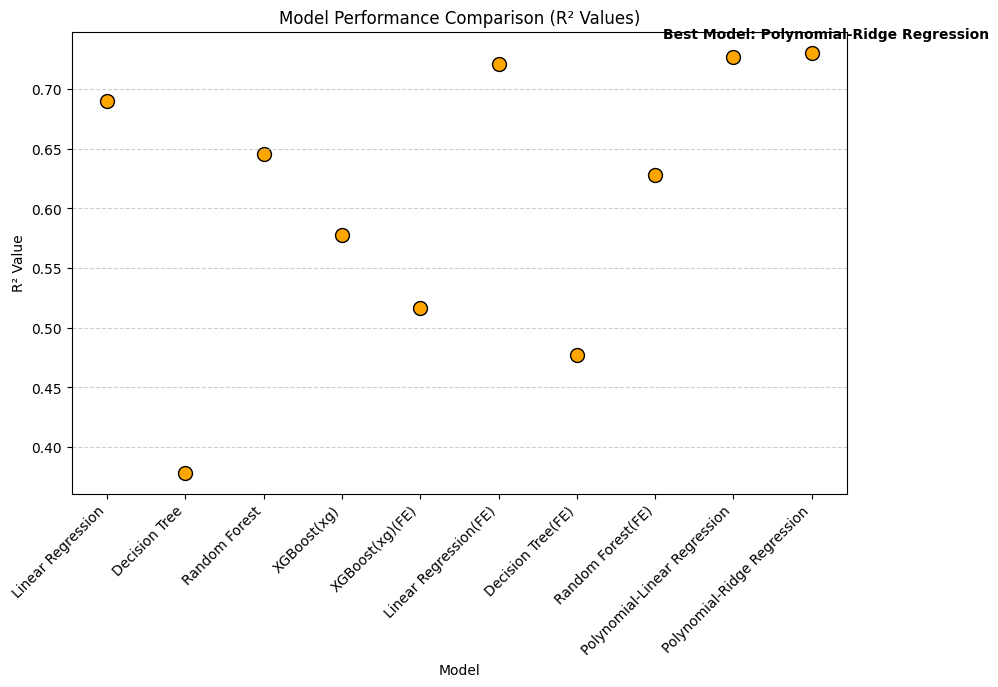

In [ ]:
# Create a scatter plot to show the R² values for each model
r2_filtered = [r for i, r in enumerate(r2) if models[i] not in ['Polynomial Regression(deg=2)', 'Polynomial Regression'] and r is not None]
models_filtered = [m for i, m in enumerate(models) if models[i] not in ['Polynomial Regression(deg=2)', 'Polynomial Regression'] and r2[i] is not None]

plt.figure(figsize=(10, 6))
plt.scatter(models_filtered, r2_filtered, color='orange', s=100, edgecolors='black')
plt.xlabel('Model')
plt.ylabel('R² Value')
plt.title('Model Performance Comparison (R² Values)')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotate the best model
best_model_idx = r2_filtered.index(max(r2_filtered))
plt.annotate(f'Best Model: {models_filtered[best_model_idx]}',
             (models_filtered[best_model_idx], r2_filtered[best_model_idx]),
             textcoords="offset points", xytext=(10,10), ha='center',
             fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Predict with test data



# Make predictions
y_pred_train = pipeline_poly_ridge.predict(X_train)
y_pred_cv = pipeline_poly_ridge.predict(X_cv)
y_pred_test = pipeline_poly_ridge.predict(X_test)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_cv = r2_score(y_cv, y_pred_cv)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate using Mean Squared Error (optional)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_cv = mean_squared_error(y_cv, y_pred_cv)
mse_test = mean_squared_error(y_test, y_pred_test)

# Cross-validation score (e.g., using 5-fold cross-validation)
cv_score = cross_val_score(pipeline_poly_ridge, X_train, y_train, cv=5, scoring='r2')

# Print the results
print('Final model: Polynomial-Ridge Regression')
print(f"R² value for Test Set: {r2_test:.4f}")
print(f"Mean Squared Error for Test Set: {mse_test:.4f}")
print(f"Cross-validation R² scores: {cv_score}")
print(f"Average Cross-validation R²: {cv_score.mean():.4f}")

Final model: Polynomial-Ridge Regression
R² value for Test Set: 0.6492
Mean Squared Error for Test Set: 1129818794575.3831
Cross-validation R² scores: [0.69035646 0.565788   0.37928627 0.64081958 0.46153013]
Average Cross-validation R²: 0.5476


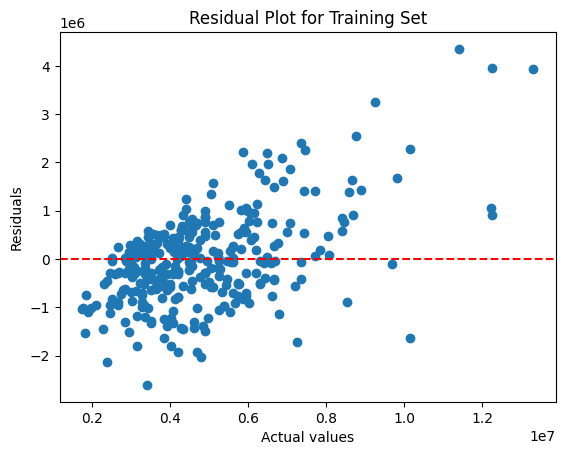

In [ ]:
# Residuals for Train Set
residuals_train = y_train - pipeline_poly_ridge.predict(X_train)

# Residual plot for training data
plt.scatter(y_train, residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Training Set')
plt.show()

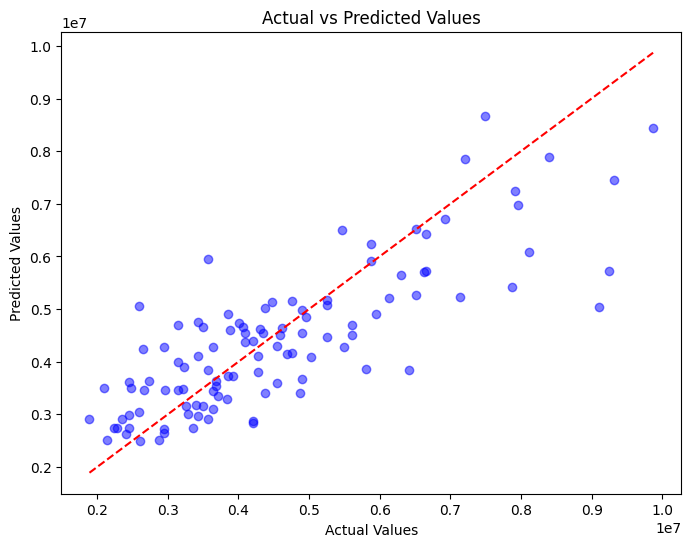

In [ ]:
# Actual vs Predicted values
y_pred = pipeline_poly_ridge.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

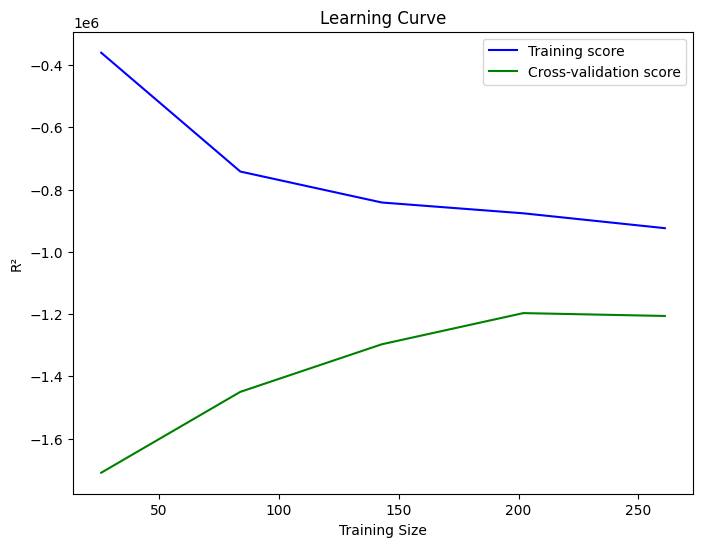

In [ ]:
# Compute learning curves
train_sizes, train_scores, val_scores = learning_curve(pipeline_poly_ridge, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

# Mean and std deviation of train and validation scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green')
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Save the trained model using Pickle or Joblib.

In [ ]:
import joblib

# Save the model using Joblib
joblib.dump(pipeline_poly_ridge, 'housing_model.joblib')

# Load the model using Joblib
loaded_model = joblib.load('housing_model.joblib')

print("Model saved and loaded successfully using Joblib!")


Model saved and loaded successfully using Joblib!
